## ME/CFS vs Depression Classification Dataset

The goal of this model is to classify individuals with Myalgic Encephalomyelitis) / Chronic Fatigue Syndrome (ME/CFS_, Depression, or Both

- ME/CFS is a physical, multisystem condition that can include emotional distress as a result of chronic illness.

- Depression is a mental health disorder that can also cause physical symptoms like fatigue.


### Dataset

Data set from: https://www.kaggle.com/datasets/storytellerman/mecfs-vs-depression-classification-dataset

#### Importing the dataset into a pandas dataframe

In [63]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette("cubehelix", 8))

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

# Statistical testing
from scipy.stats import ttest_ind

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Model selection & tuning
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    average_precision_score,
)


In [7]:
df = pd.read_csv('me_cfs_vs_depression_dataset.csv')
df.head()

age  gender  sleep_quality_index  brain_fog_level  physical_pain_score  \
0   56    Male                  8.7              3.9                  9.2   
1   69    Male                  1.3              9.9                  4.2   
2   46  Female                  4.0              5.4                  4.8   
3   32  Female                  9.4              2.1                  2.9   
4   60  Female                  7.6              7.5                  6.4   

   stress_level  depression_phq9_score  fatigue_severity_scale_score  \
0           8.1                   10.0                           6.5   
1           9.9                   20.0                           7.0   
2           NaN                   24.0                           1.6   
3           3.8                   10.0                           6.8   
4           8.5                   17.0                           7.0   

   pem_duration_hours  hours_of_sleep_per_night  pem_present  \
0                 9.0                       7.7            0   
1                41.0                       8.4            1   
2                13.0                       6.9            0   
3                11.0                       7.5            0   
4                46.0                       3.1            1   

         work_status social_activity_level exercise_frequency  \
0            Working                   Low              Daily   
1            Working                   Low              Often   
2  Partially working                   NaN             Rarely   
3        Not working                  High              Never   
4        Not working                   Low             Rarely   

  meditation_or_mindfulness   diagnosis  
0                       Yes  Depression  
1                       Yes        Both  
2                       Yes  Depression  
3                       Yes  Depression  
4                        No        Both

### Exploratory Data Analysis

The goal of this section is:

1. Understand the class distribution
    - Finding out the if classes are balanced or imbalanced
2. Underrstand the distribution of features
    - How each feature interacts and correlates by class
3. Detecting Data Quality Issues
    - Missing Values
    - Outliers
    - Duplicates

In [8]:
df.shape

(1000, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

In [10]:
df.describe()

age  sleep_quality_index  brain_fog_level  physical_pain_score  \
count  1000.000000           953.000000       952.000000           966.000000   
mean     44.385000             5.468625         5.611765             5.521843   
std      15.321669             2.571423         2.649316             2.565460   
min      18.000000             1.000000         1.000000             1.000000   
25%      31.750000             3.100000         3.300000             3.325000   
50%      45.000000             5.600000         5.800000             5.600000   
75%      57.000000             7.700000         7.900000             7.800000   
max      70.000000            10.000000        10.000000            10.000000   

       stress_level  depression_phq9_score  fatigue_severity_scale_score  \
count    952.000000             978.000000                    979.000000   
mean       5.459139              12.268916                      6.407252   
std        2.566536               6.306588                      2.206937   
min        1.000000               0.000000                      0.000000   
25%        3.300000               9.000000                      6.300000   
50%        5.400000              10.000000                      7.000000   
75%        7.700000              16.000000                      7.500000   
max       10.000000              27.000000                     10.000000   

       pem_duration_hours  hours_of_sleep_per_night  pem_present  
count          976.000000                979.000000  1000.000000  
mean            23.105533                  6.571297     0.599000  
std             13.823953                  2.040320     0.490346  
min              0.000000                  3.000000     0.000000  
25%             11.000000                  4.800000     0.000000  
50%             23.000000                  6.600000     1.000000  
75%             35.000000                  8.350000     1.000000  
max             47.000000                 10.000000     1.000000

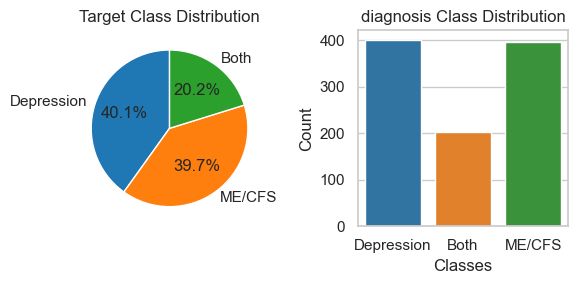

In [11]:
def get_class_counts(df,feature):
    class_count = df[feature].value_counts(normalize = True)

    colors = ["#1f77b4","#ff7f0e","#2ca02c", "#d62728","#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22",]
    
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    class_count.plot.pie(autopct='%1.1f%%', startangle=90, colors = colors )
    plt.title('Target Class Distribution')
    plt.ylabel('')

    plt.subplot(1,2,2)
    sns.countplot(x = feature, data=df, palette='tab10')
    plt.title(f"{feature} Class Distribution")
    plt.xlabel('Classes')
    plt.ylabel('Count')

    
    plt.tight_layout()
    plt.show()

get_class_counts(df,'diagnosis')

So as we can see the, the dataset is moderately imbalanced. So we will compare the preformance of the model using this base class distribution, and some other oversampling techniques

#### Missing Values

In [12]:
missing_val_percent = df.isna().mean().sort_values(ascending=False)*100
missing_val_percent[missing_val_percent > 0]

brain_fog_level                 4.8
stress_level                    4.8
sleep_quality_index             4.7
work_status                     4.7
social_activity_level           4.0
exercise_frequency              3.9
physical_pain_score             3.4
pem_duration_hours              2.4
depression_phq9_score           2.2
fatigue_severity_scale_score    2.1
hours_of_sleep_per_night        2.1
meditation_or_mindfulness       1.1
dtype: float64

So only a small percentage of our dataset contains missing values, so we will impute these using statiscal measures. Lets see the distribution of these missing columns to inform us on the type of statiscal measures we should use

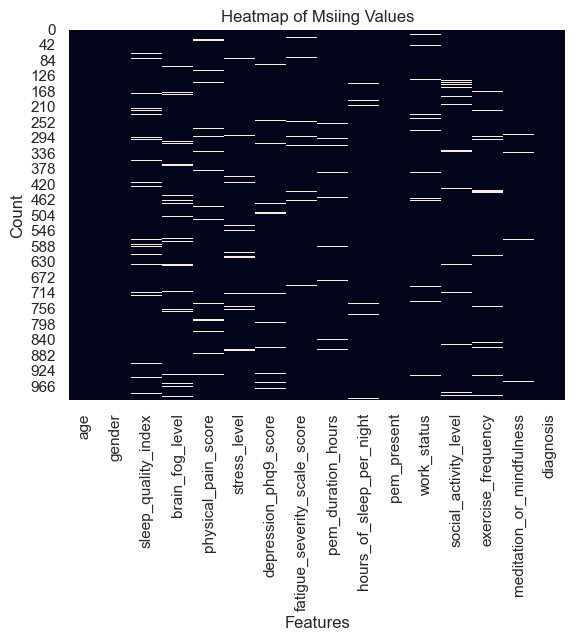

In [13]:
sns.heatmap(df.isna(),cbar = False)
plt.xlabel('Features')
plt.ylabel('Count')
plt.title("Heatmap of Msiing Values")
plt.show()

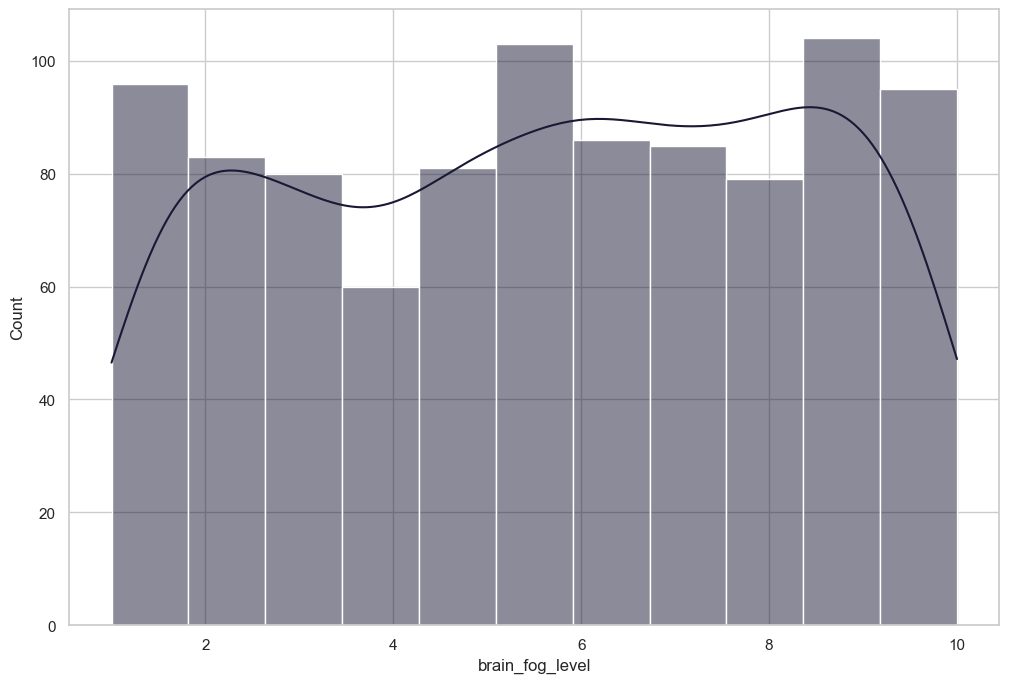

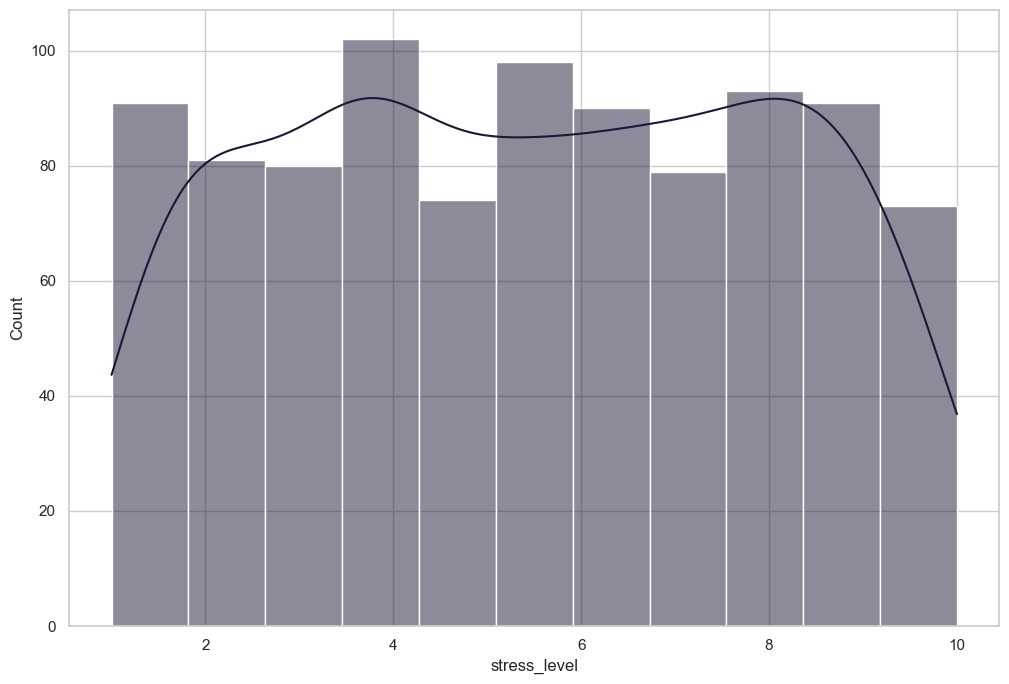

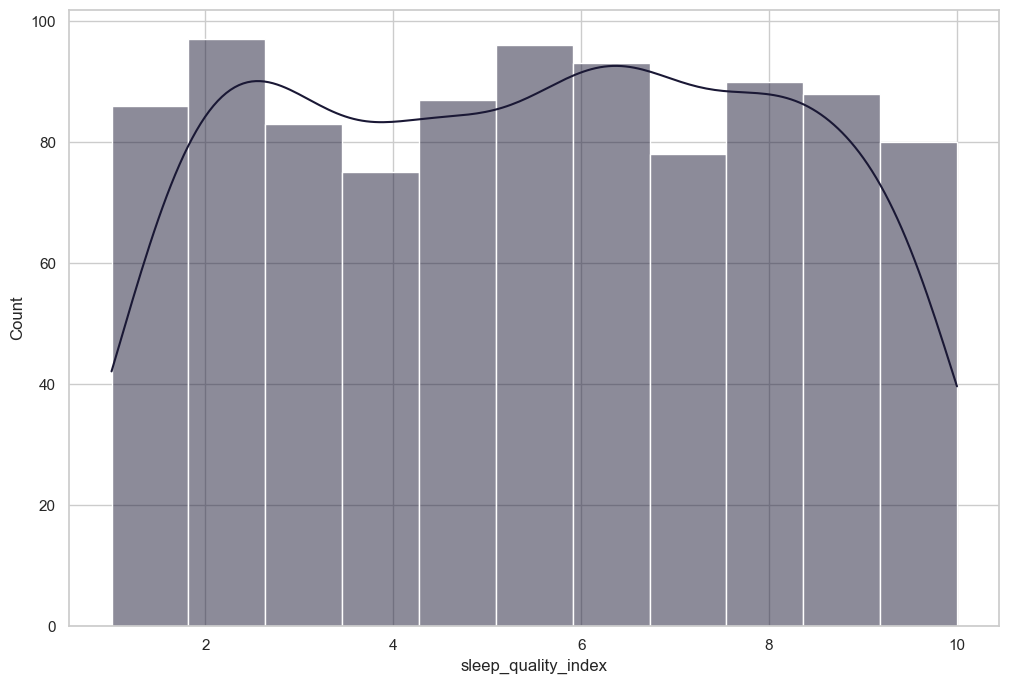

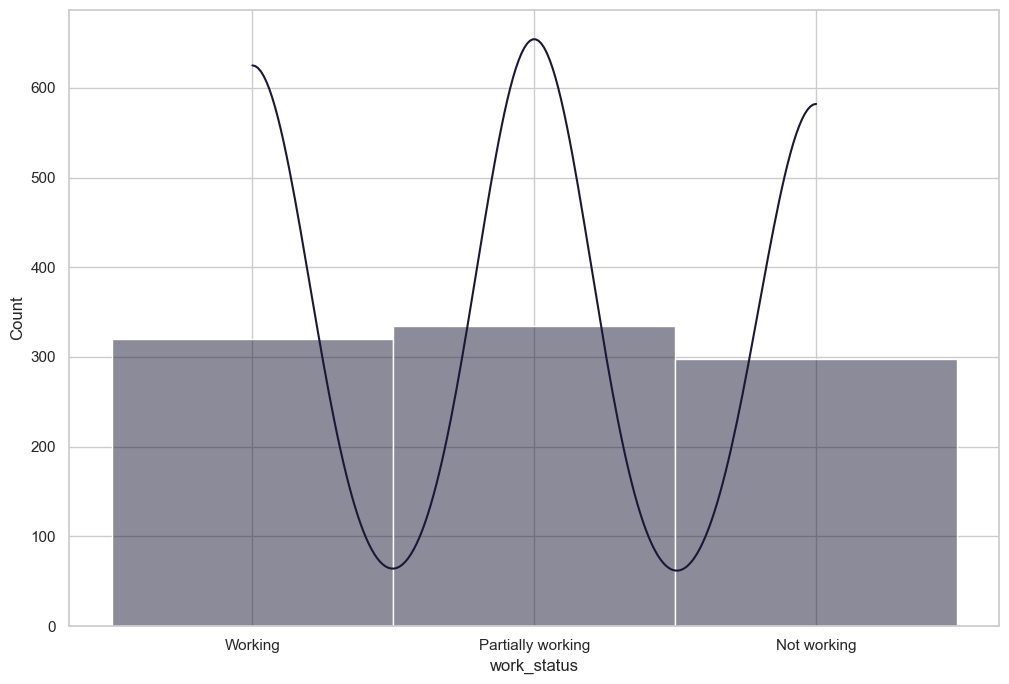

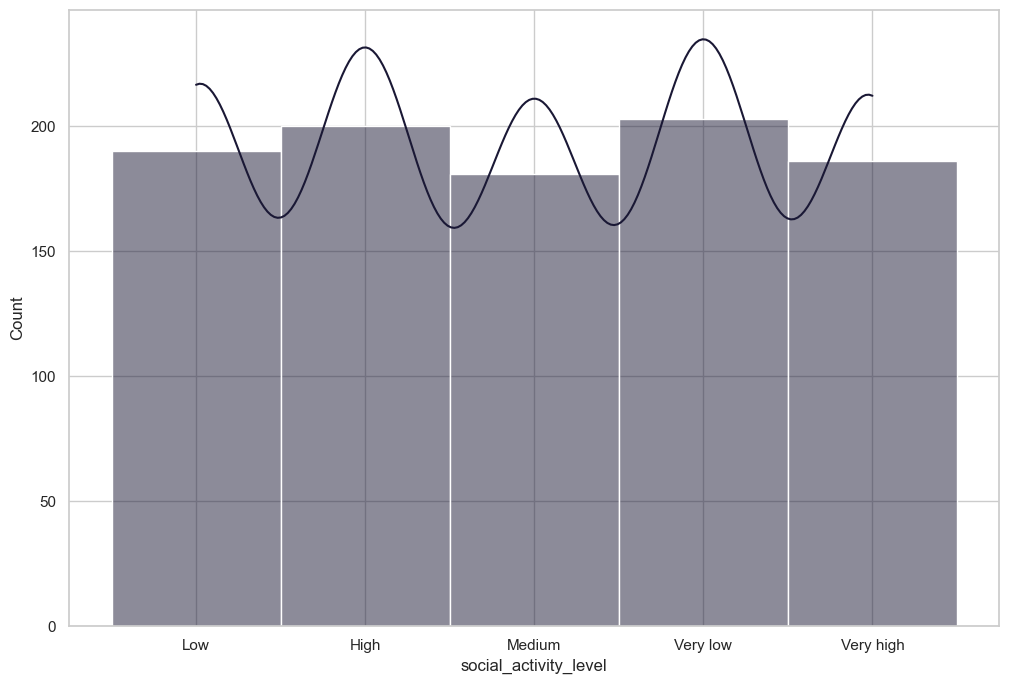

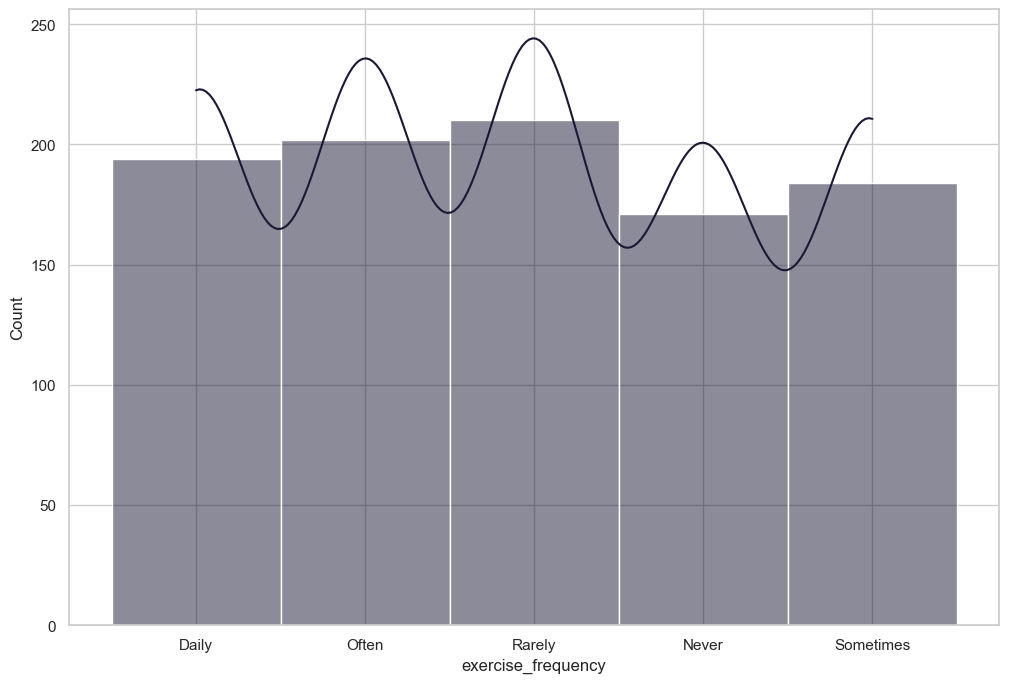

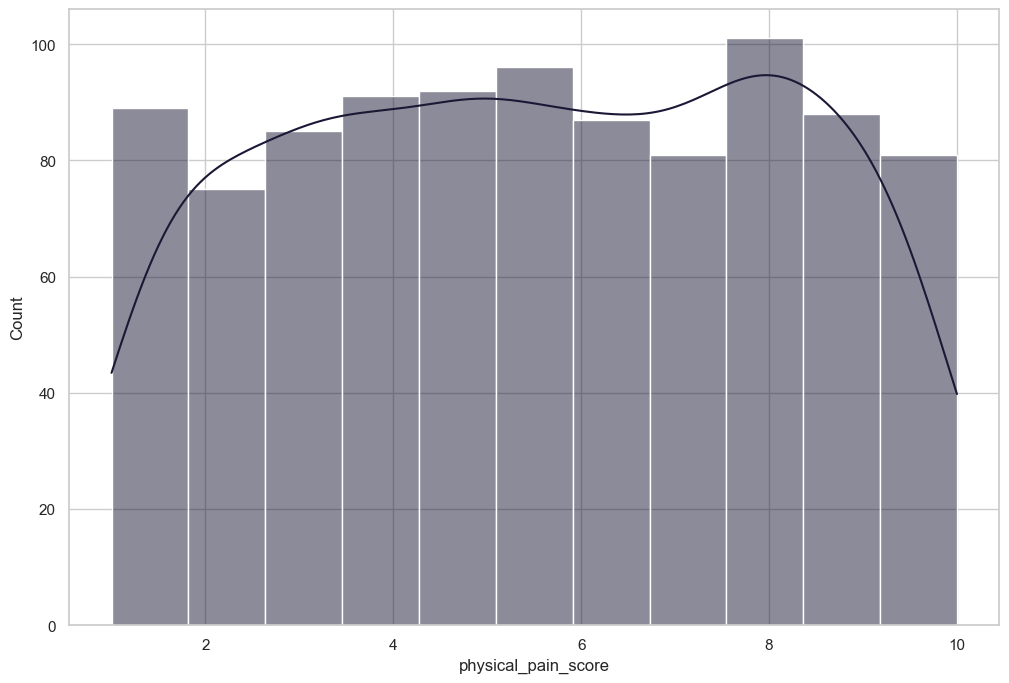

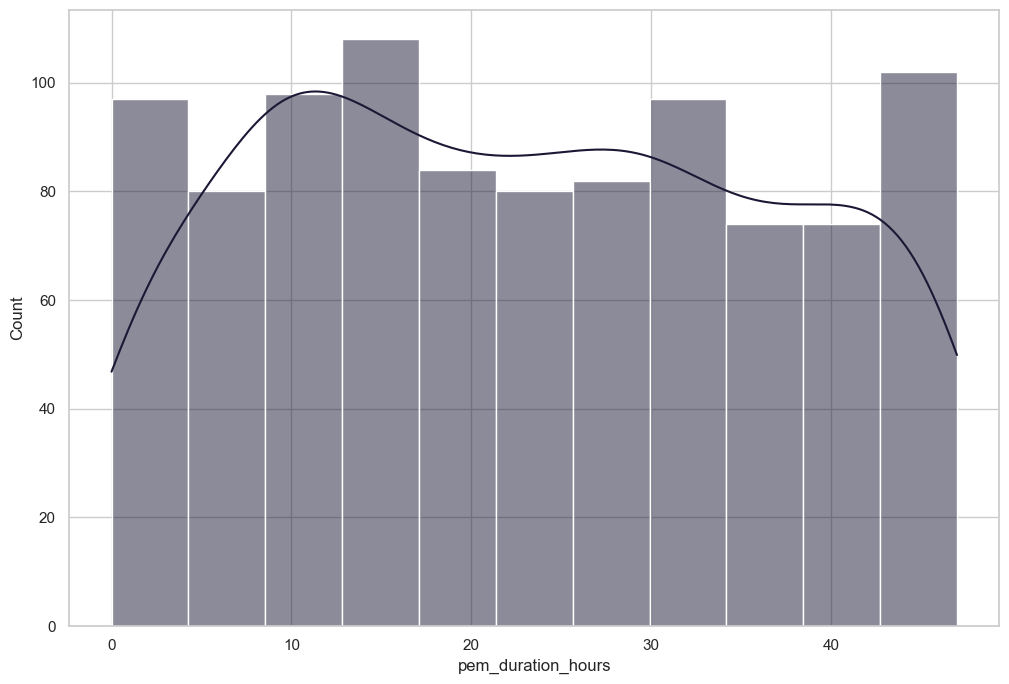

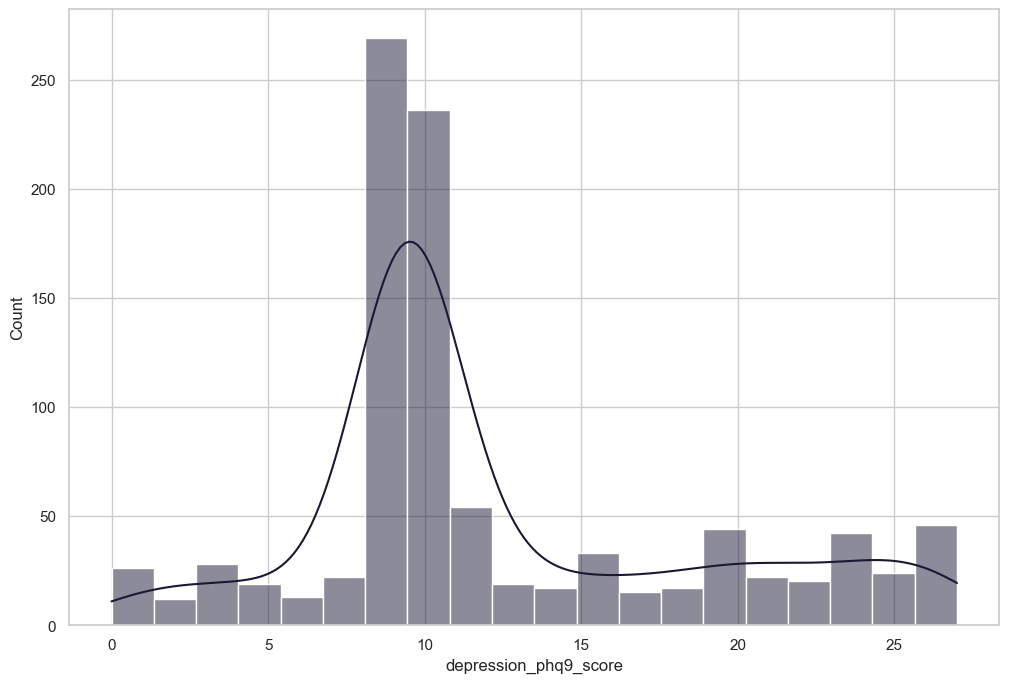

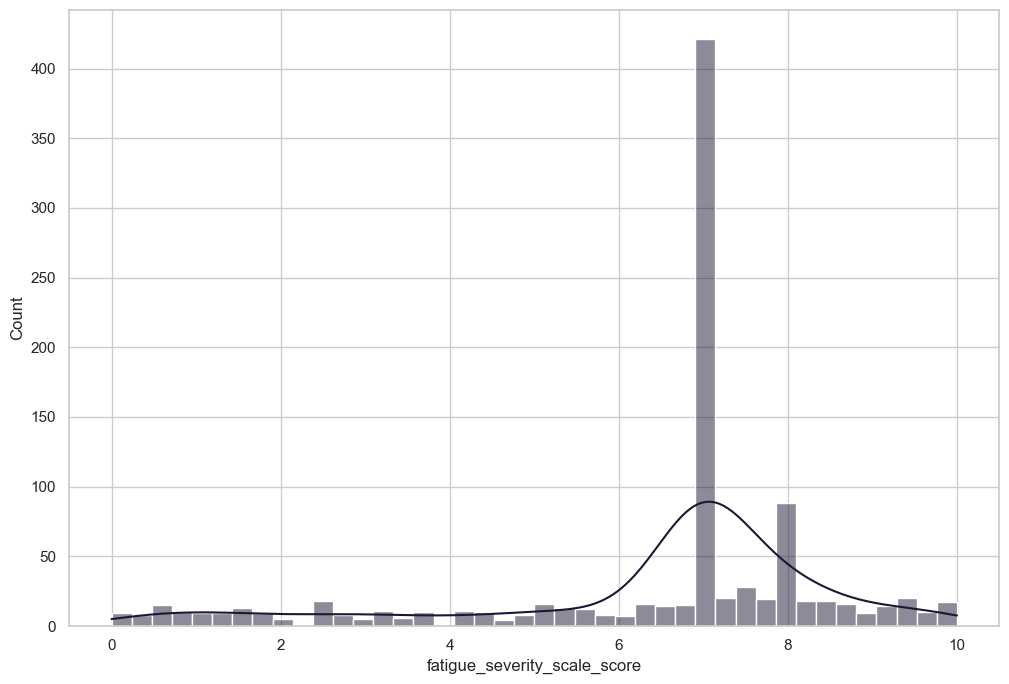

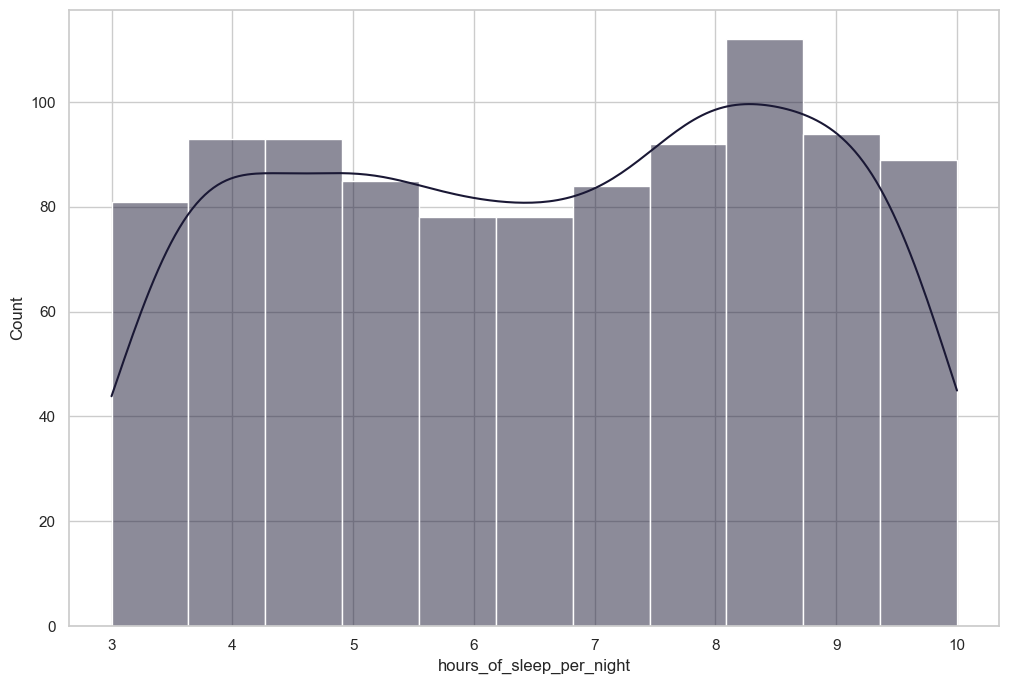

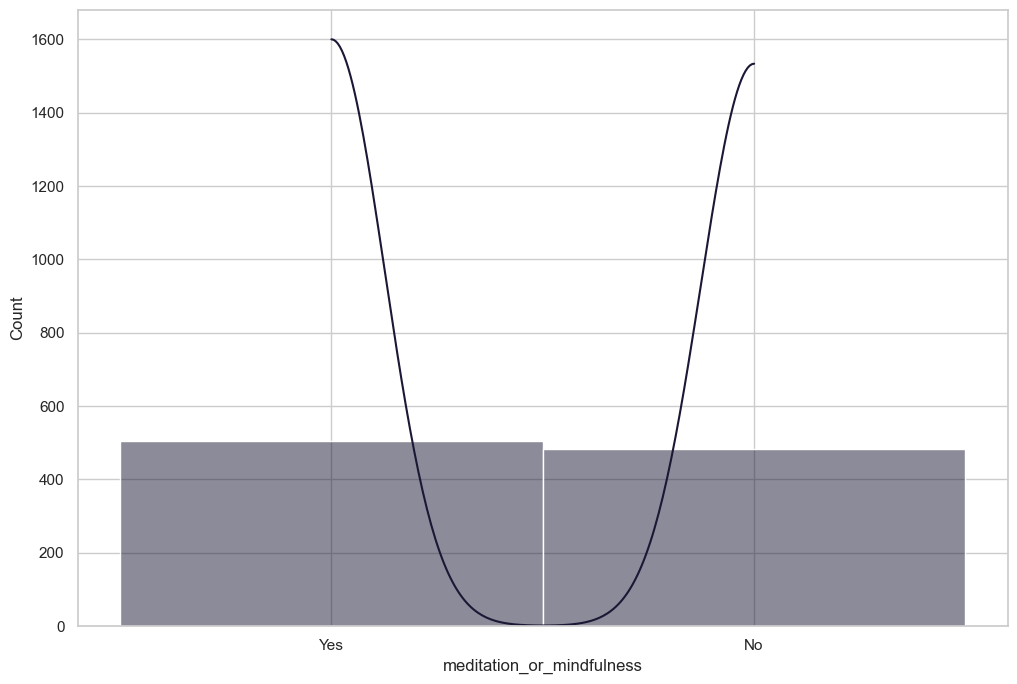

In [14]:
missing_cols = list(missing_val_percent[missing_val_percent>0].index)
def missing_distribution(df,columns):
    for cols in missing_cols: 
        plt.figure(figsize=(12,8))
        sns.histplot(x = cols, data=df,kde=True)
        plt.show()
missing_distribution(df,missing_cols)

So we can see that are the distribution of depression_phq9_score and fatigue_severity_scale_score are heavily pulled up by peaks

#### Numeric Analysis

In [15]:
def plot_numeric(df,features):
    for feature in features:
        plt.figure(figsize=(12,8))

        plt.subplot(1,3,1)
        sns.histplot(x = feature, data = df, kde=True, palette='Set2')
        plt.title(f"Histogram of {feature}")

        plt.subplot(1,3,2)
        sns.boxplot(x = feature, data=df,palette='Set2')
        plt.title(f"Boxplot of {feature}")

        plt.subplot(1, 3, 3)
        sns.violinplot(x=feature,data=df, color='lightgreen')
        plt.title(f"Violinplot of {feature}")


        plt.tight_layout()
        plt.show()

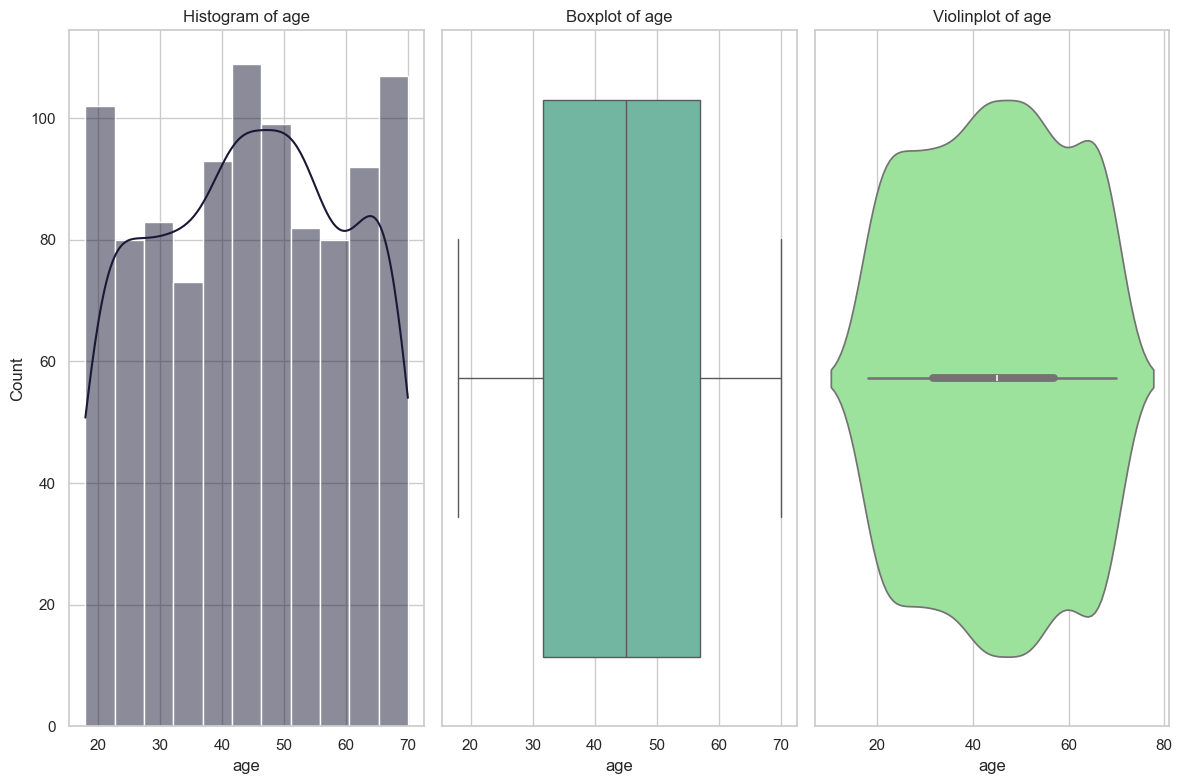

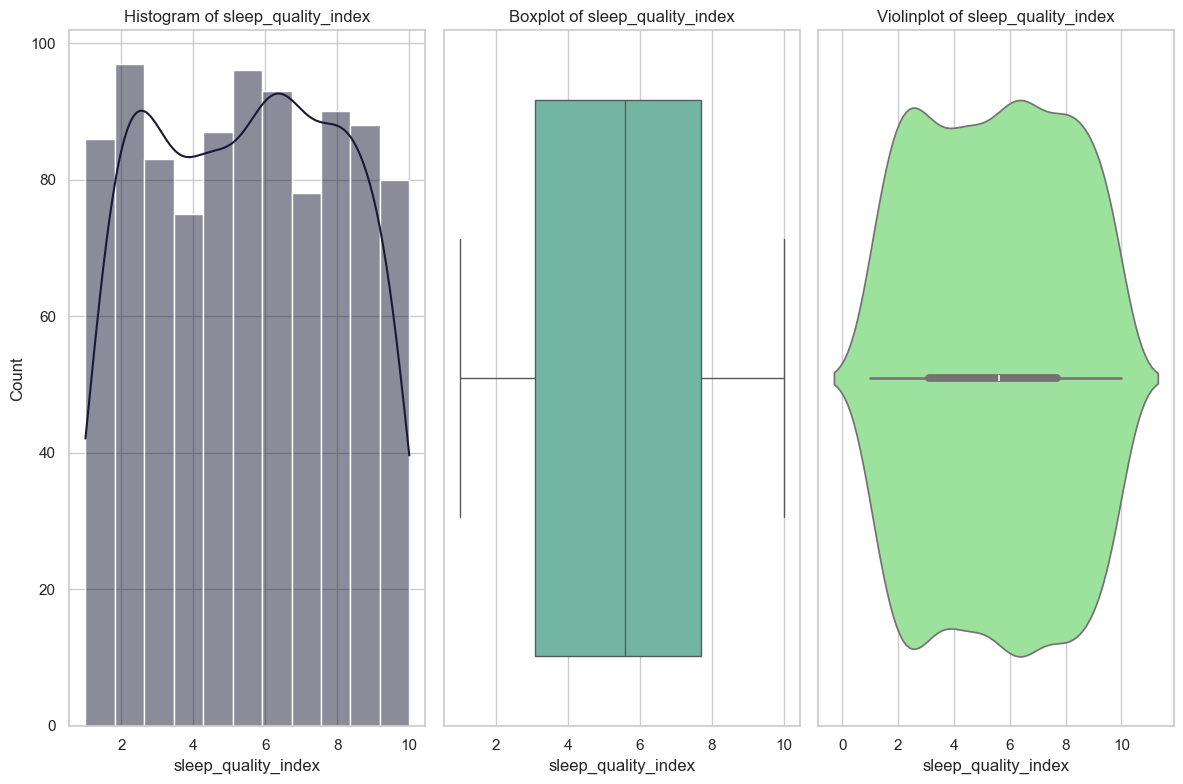

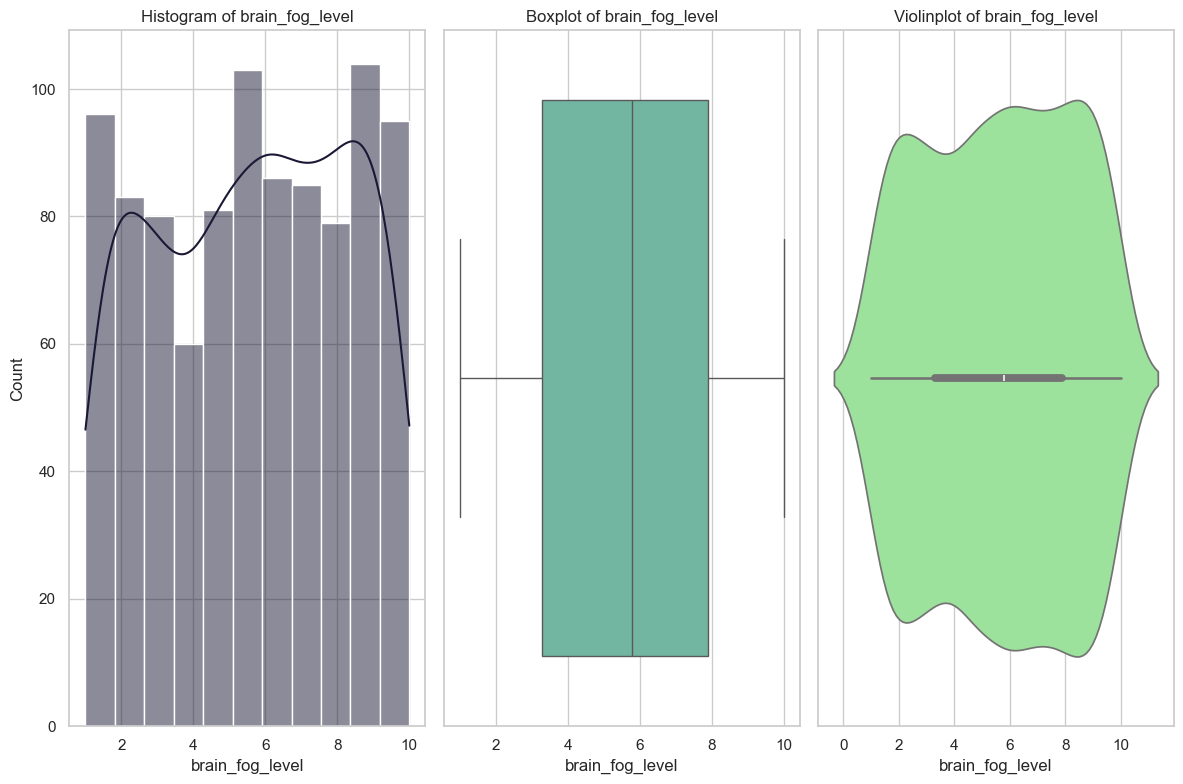

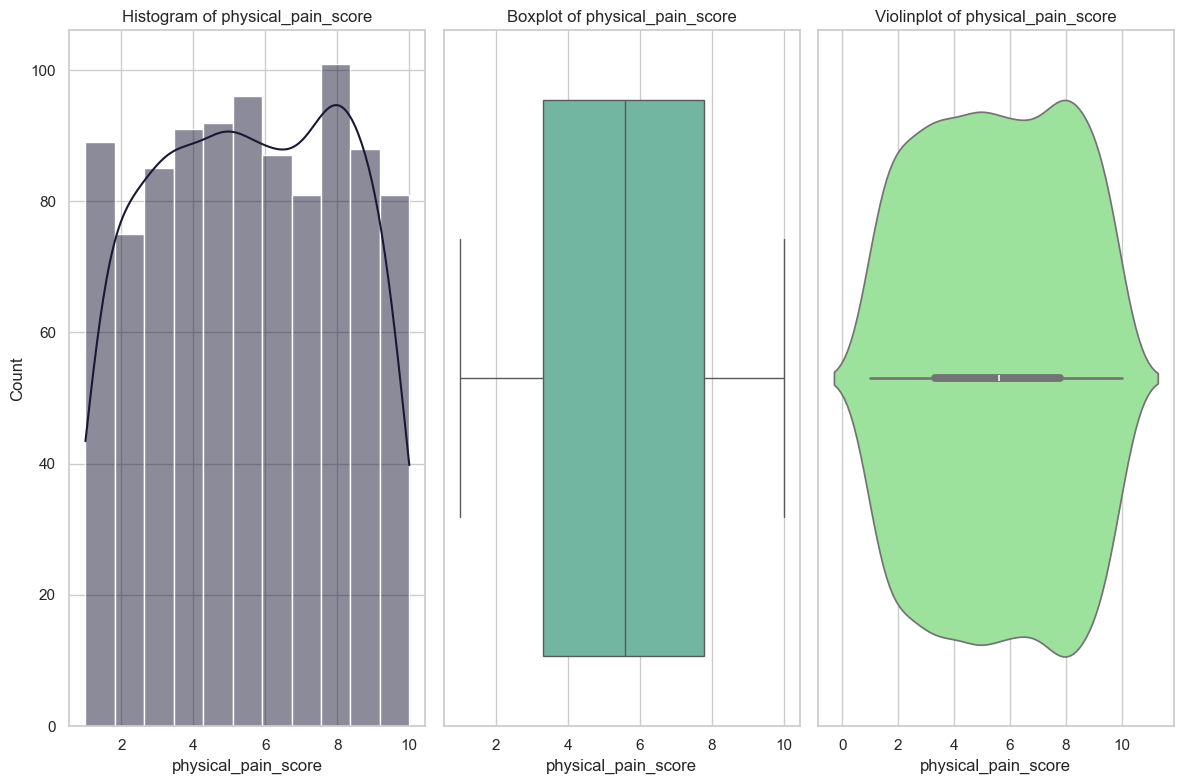

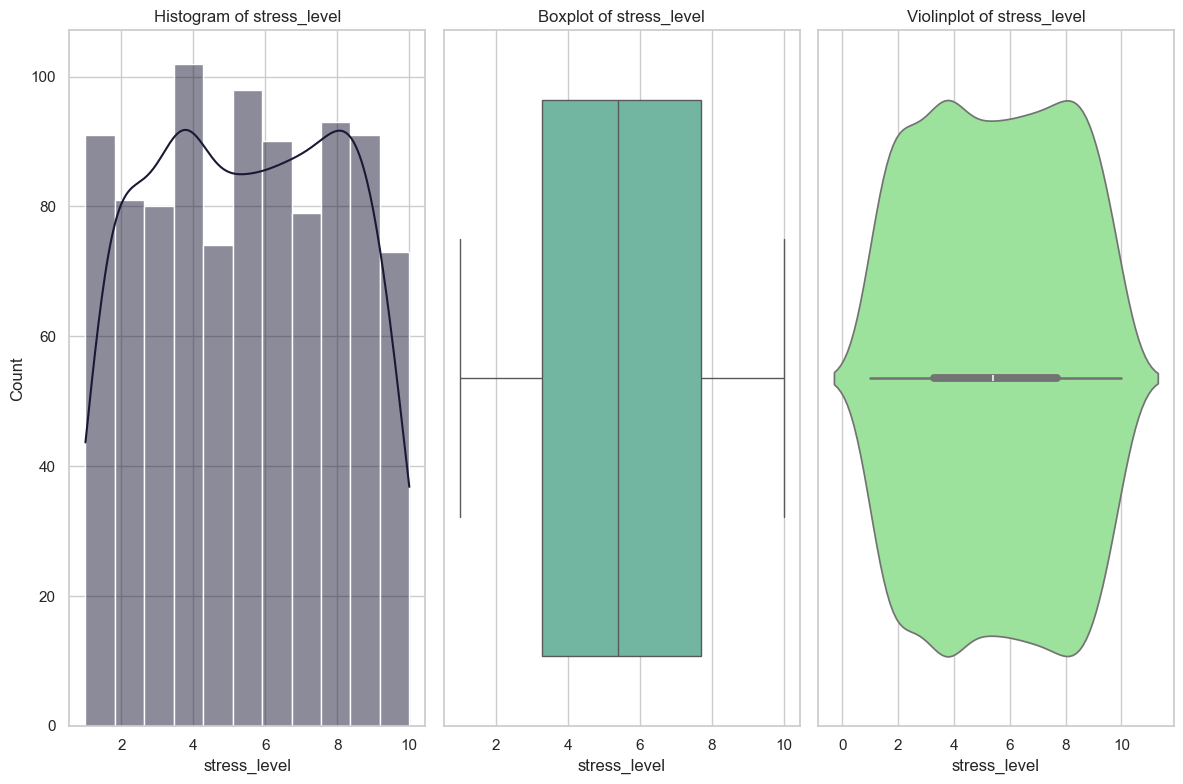

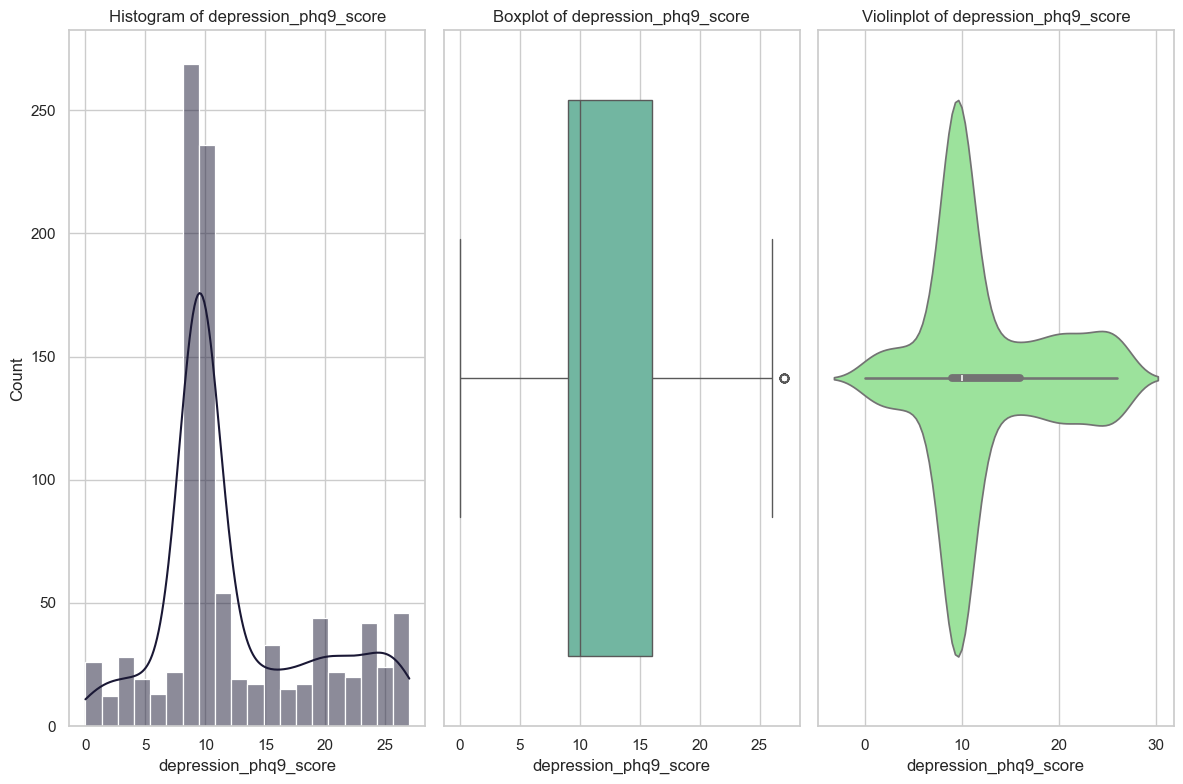

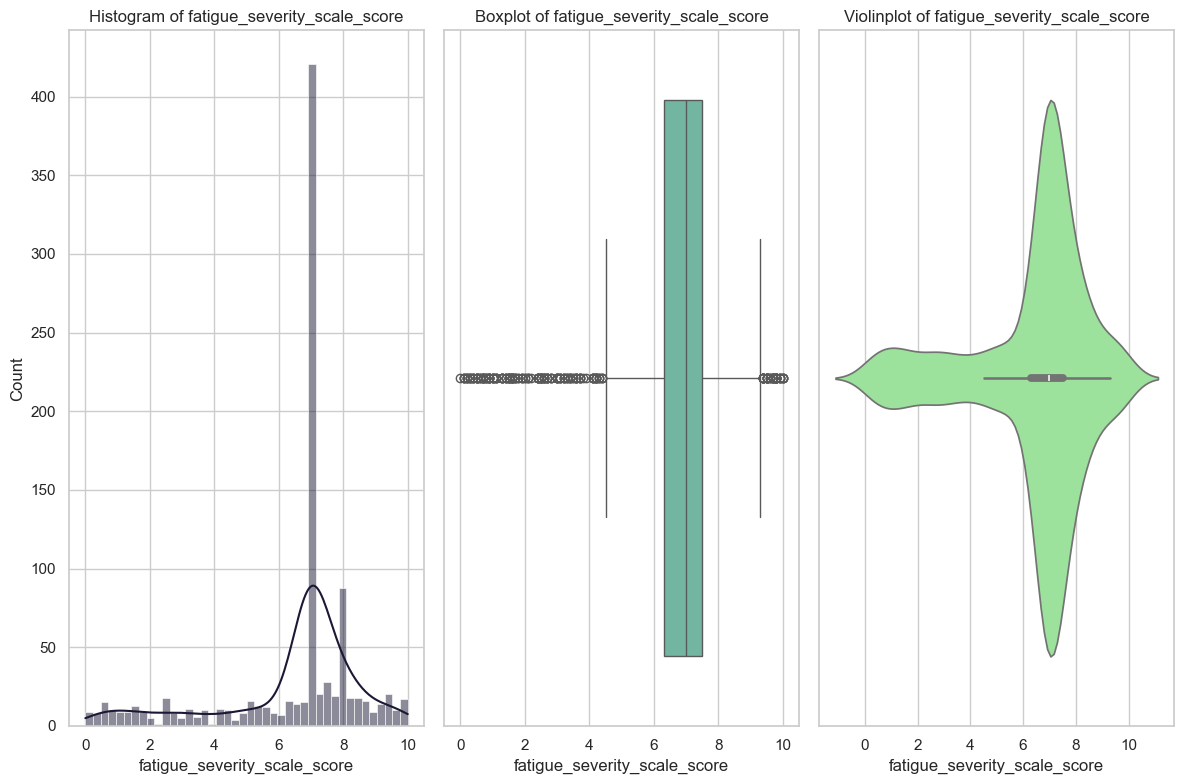

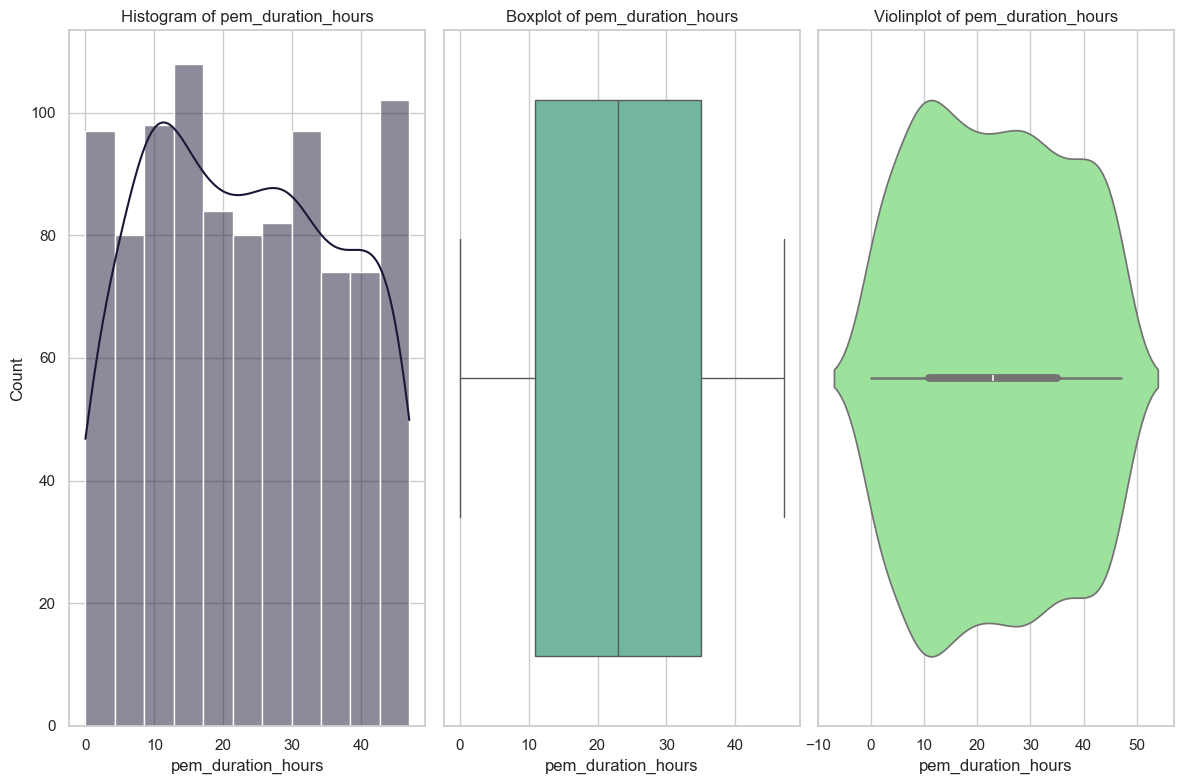

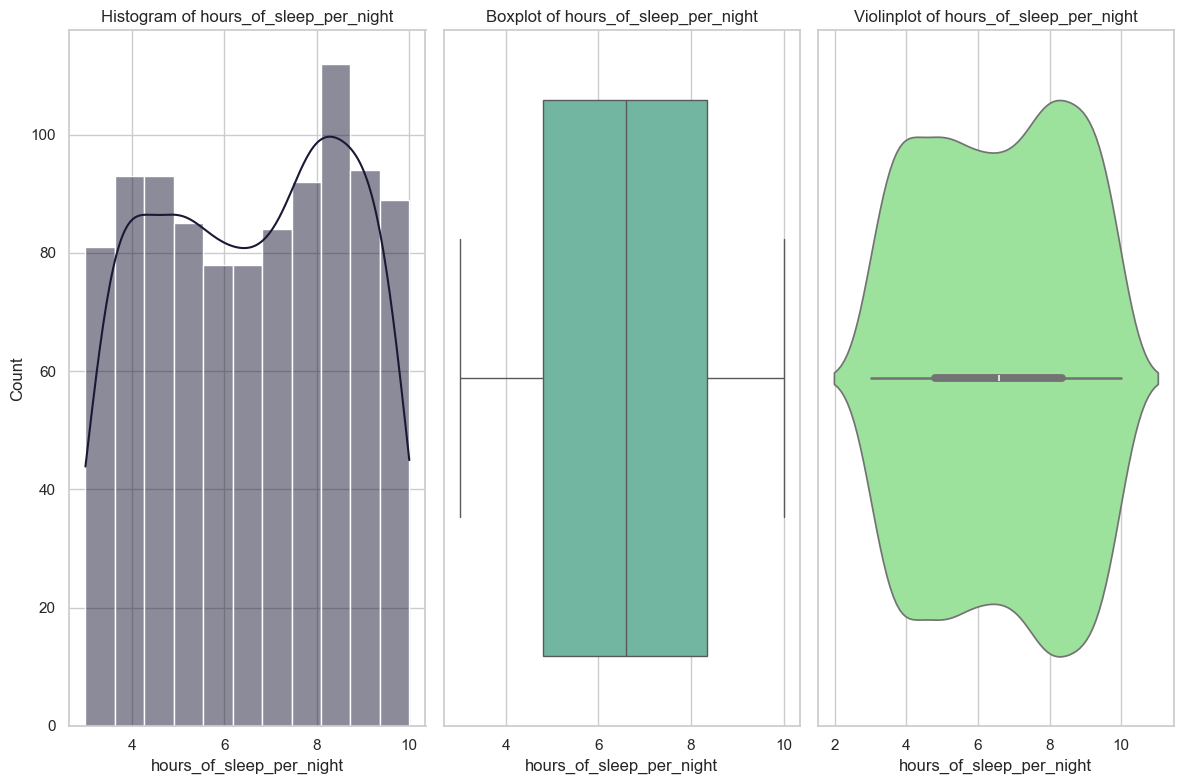

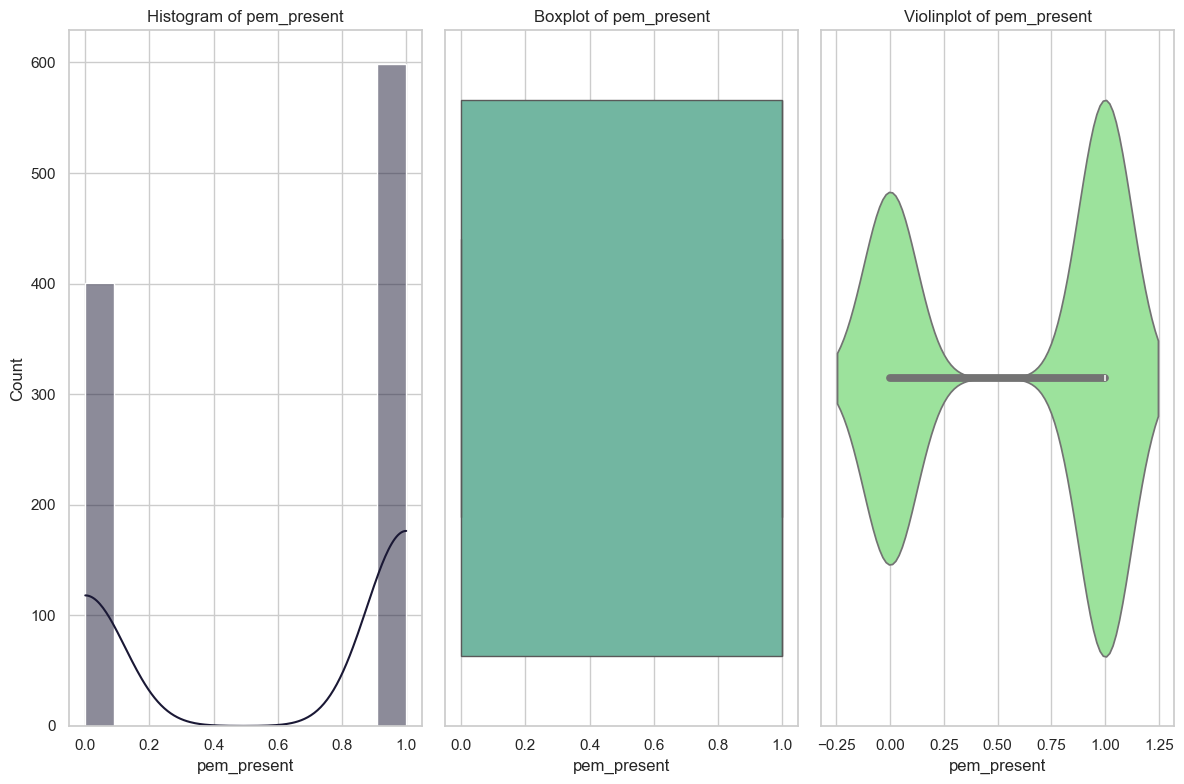

In [16]:
num_features = df.select_dtypes(include=['number']).columns
plot_numeric(df,num_features)

Some inital observations...

- As we can see from the histogram and boxplot, fatigue_severity_scale_score contains many outliers so we may have to do some further investigation on that
- As for depression_ph9_score there is a heavy peak around values 10
- The counts for pem_present are slightly imbalanced but nothing out of the ordinary

In [17]:
def plot_target(df, feature):
    target = 'diagnosis'

    # 1. Subplot with Scatter and Boxplot
    plt.figure(figsize=(16, 5))

    # Scatterplot
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.6)
    plt.title(f"Scatterplot of {feature} vs {target}")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f"Boxplot of {feature} by {target}")

    plt.tight_layout()
    plt.show()


In [18]:
target_df = df.copy()
target_df['diagnosis']= df['diagnosis'].map({'ME/CFS':0 ,'Depression':1,'Both':2})

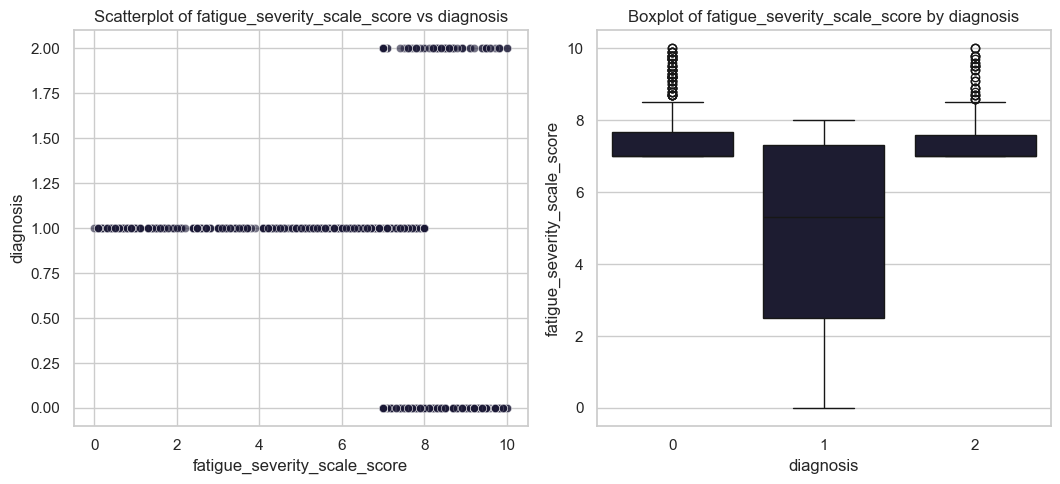

In [19]:
plot_target(target_df, 'fatigue_severity_scale_score')

So some observations here is that MC/CFS only occurs around when fatigue_severity_scale_score is greater than 7. Suggesting fatigue_severity_scale_score is a great indicator of a patients MC/CFS diagnosis. Also provides insight into depression diagnoses indicating that depression isnt heavily reliant of fatigue.

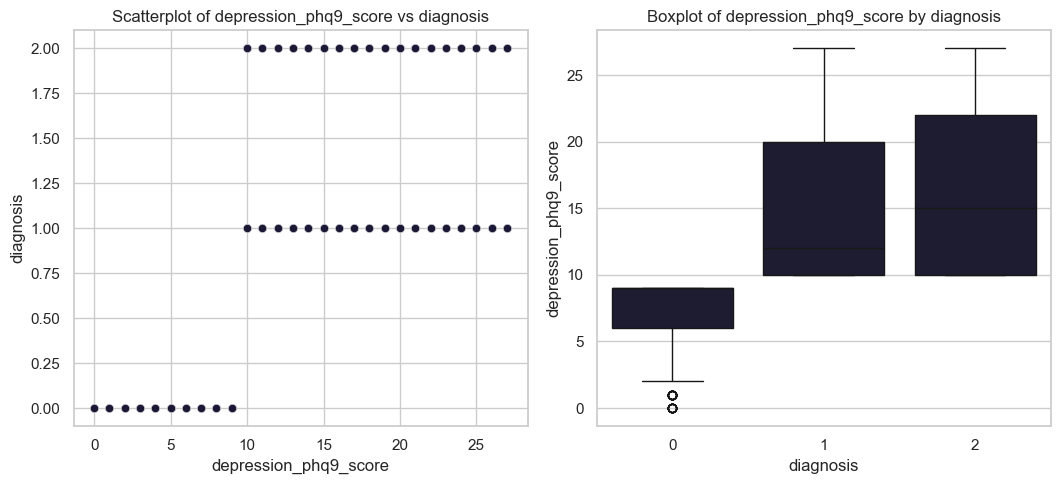

In [20]:
plot_target(target_df,'depression_phq9_score')

So we can can see that depression_phq9_score suggests that MS/CFE occurs for depression_phq9_scores less 10. Where as depression only occurs for scores greater 10. Acting as a great indicator from seperating Depression from the other labels

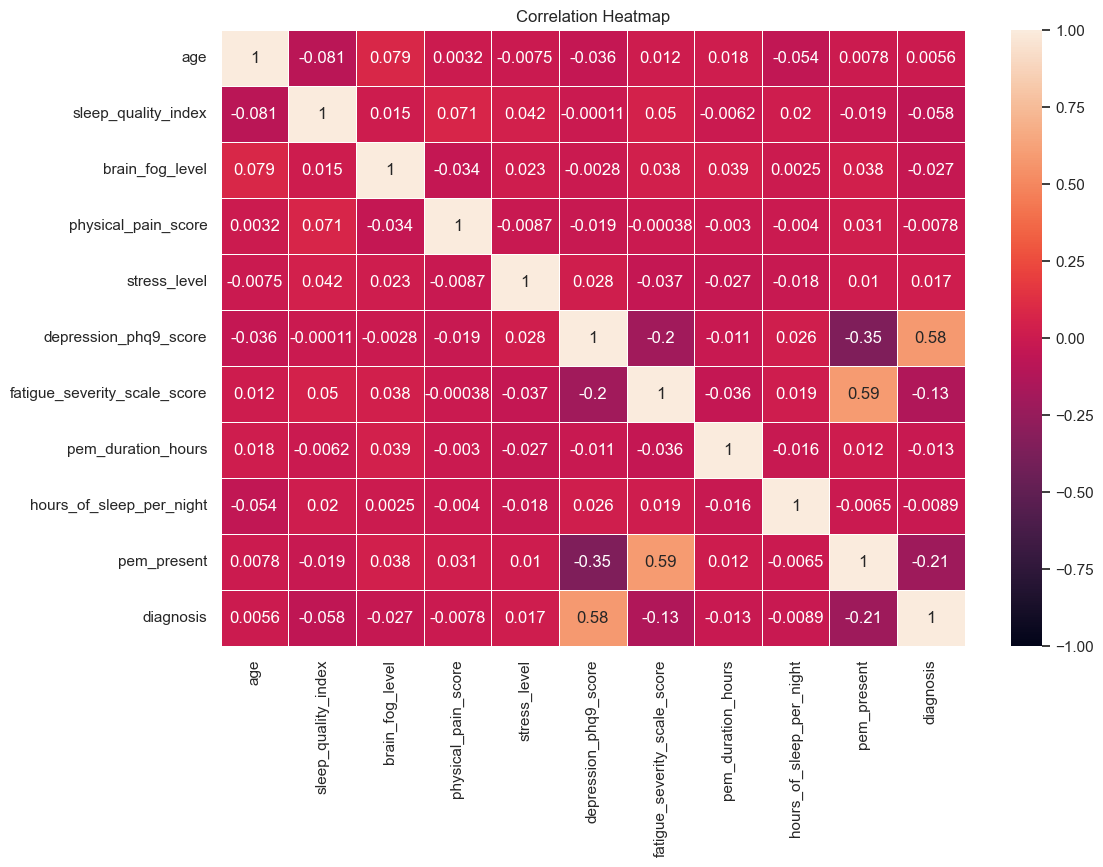

In [21]:
num_df = target_df.select_dtypes(include=['number'])
corr = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, vmin=-1, vmax=1,linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

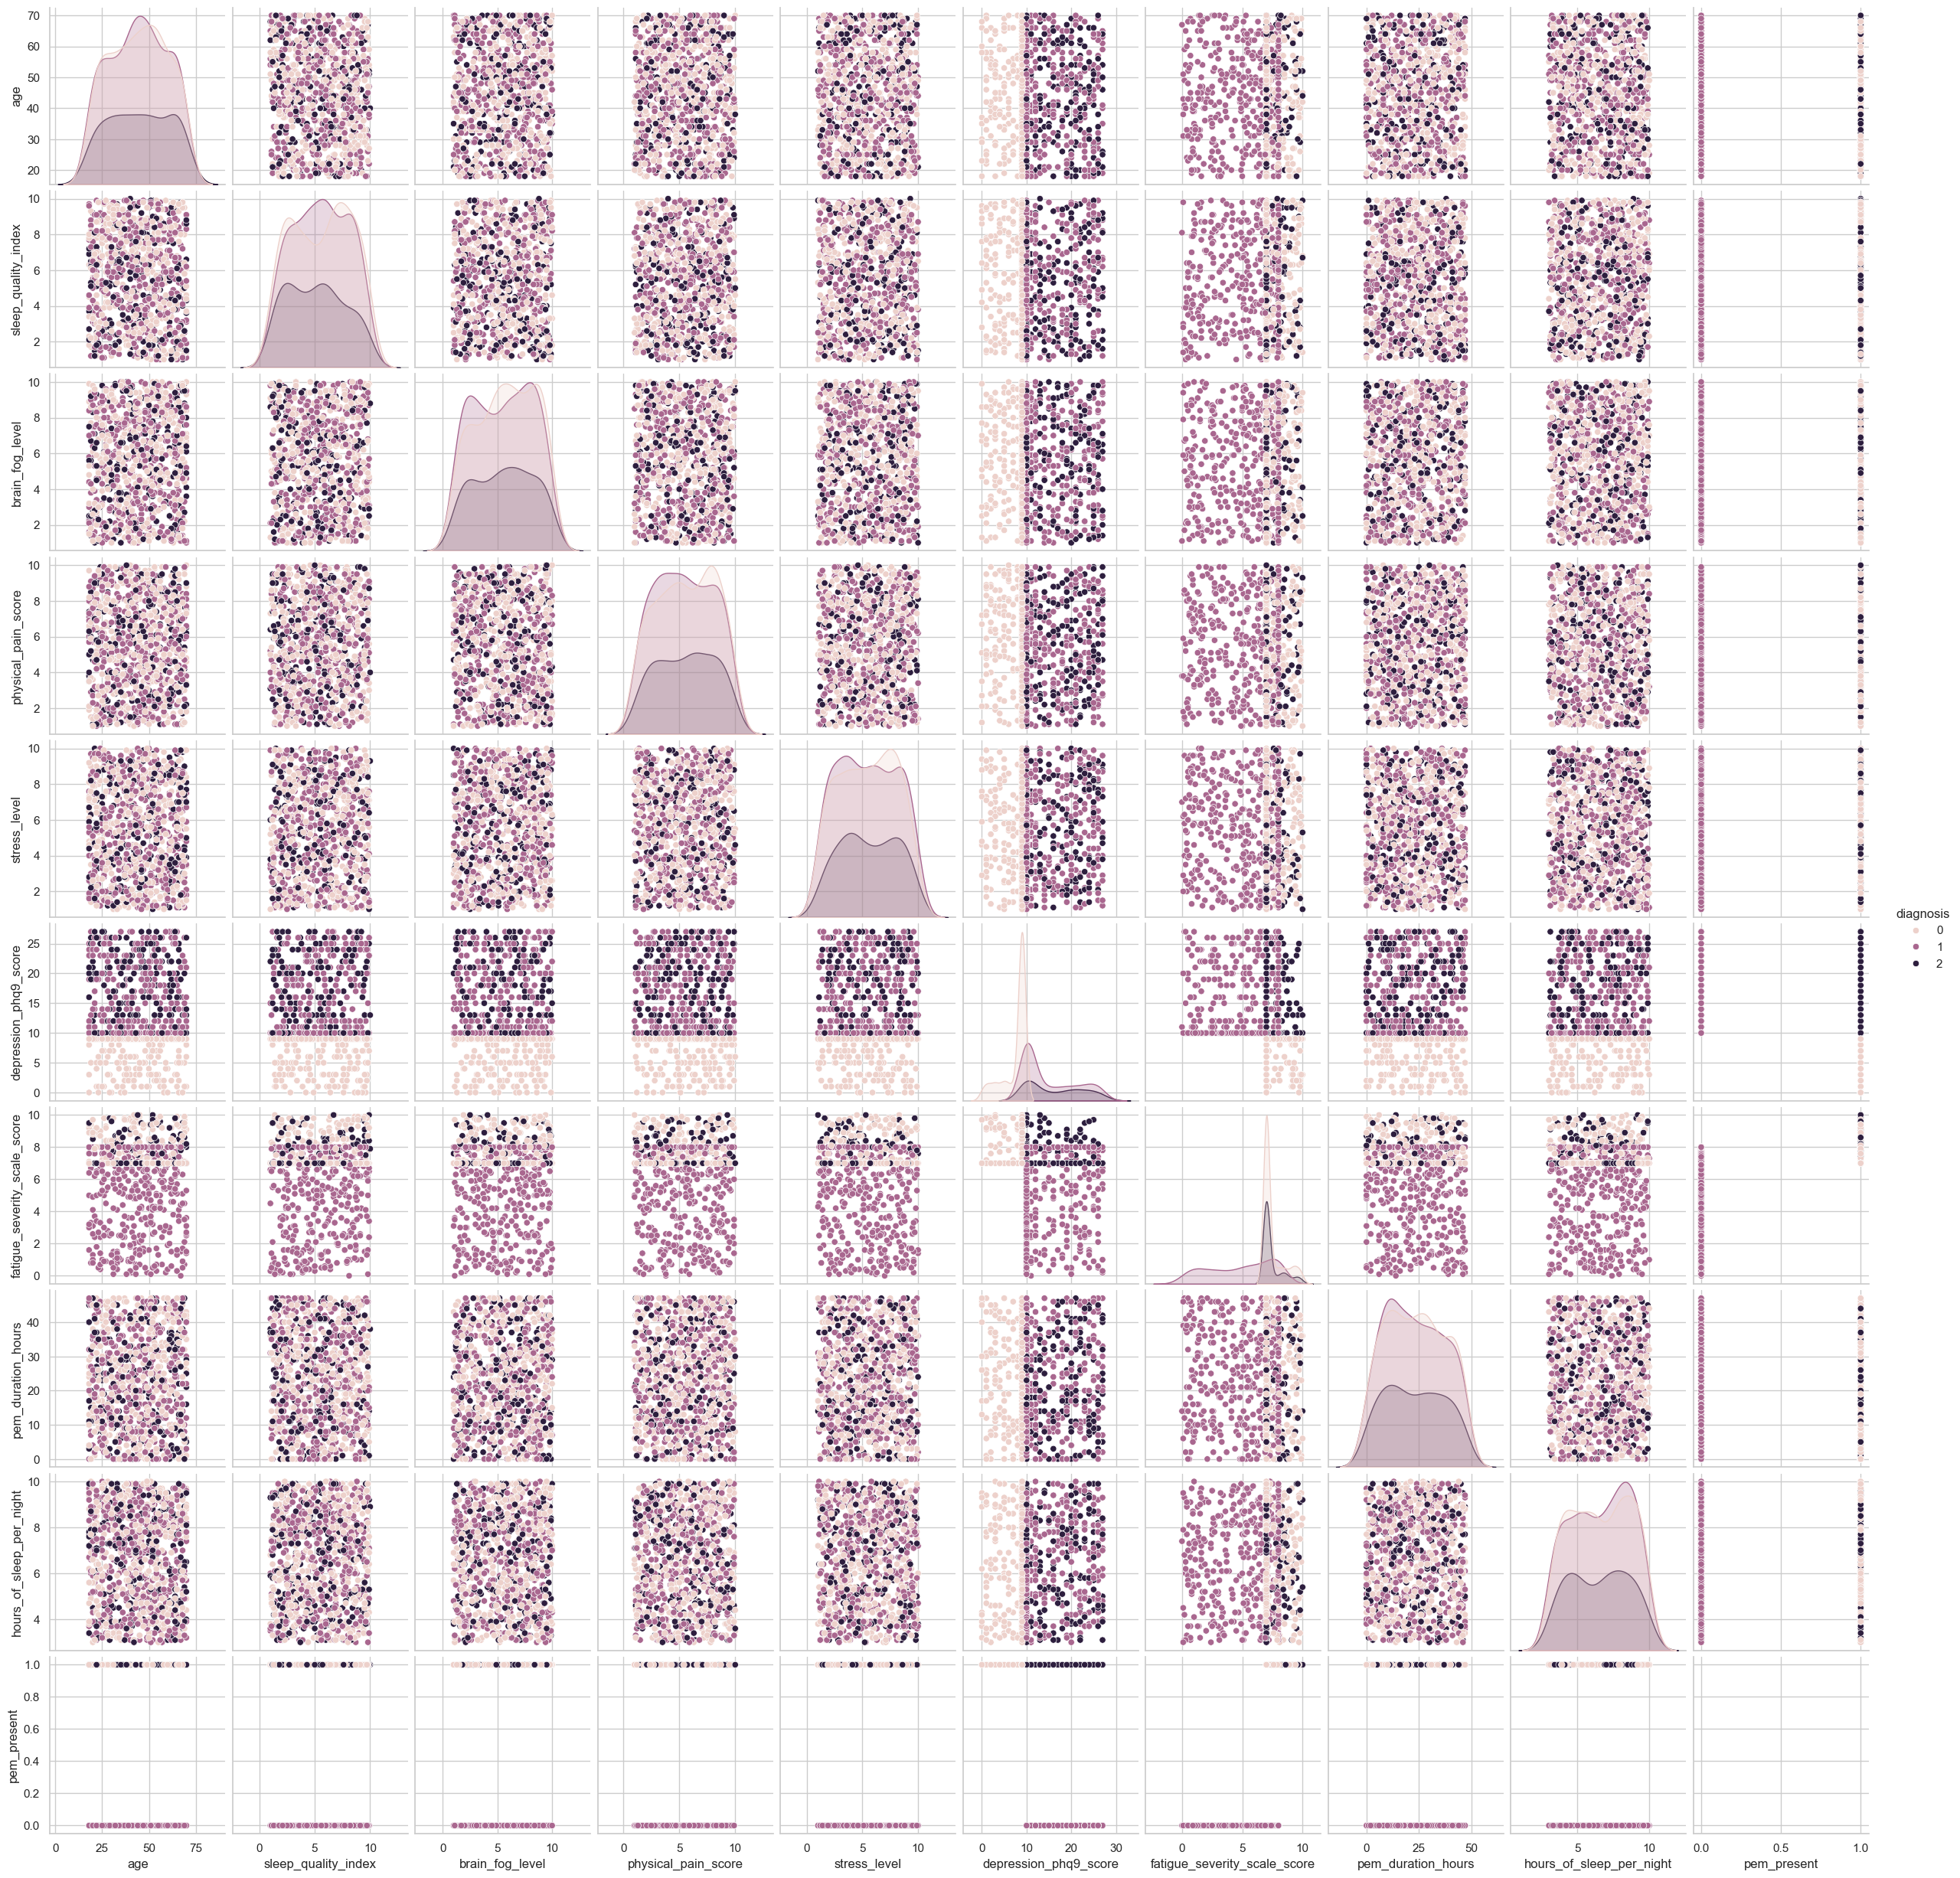

In [22]:
sns.pairplot(target_df,hue='diagnosis')

#### Categoric Analysis

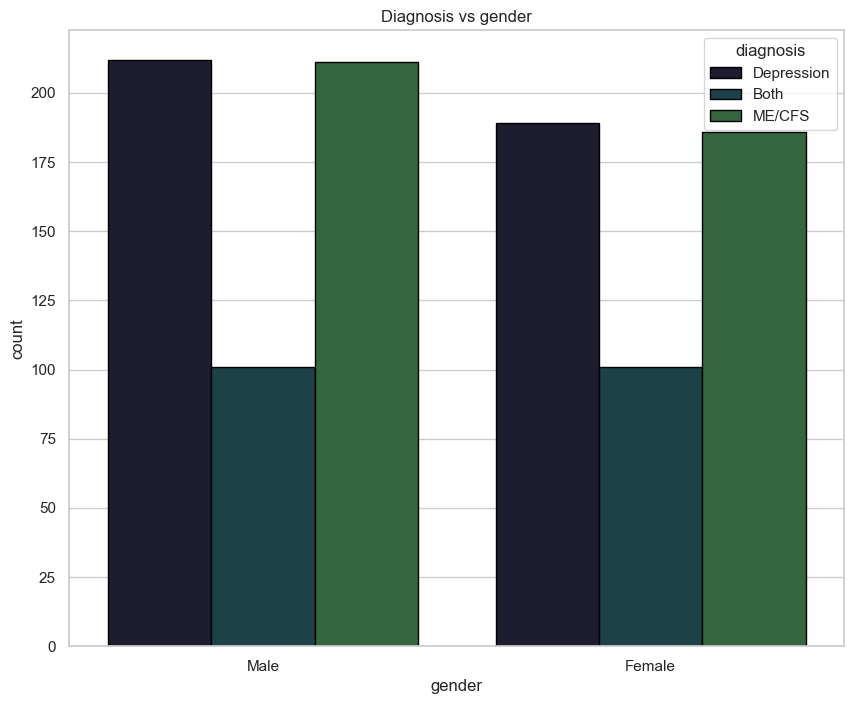

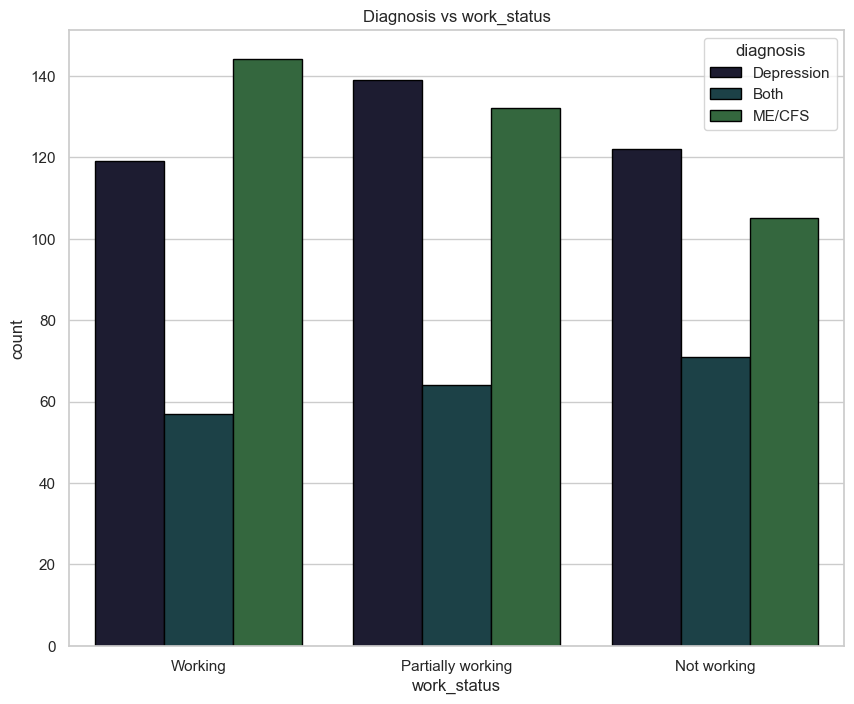

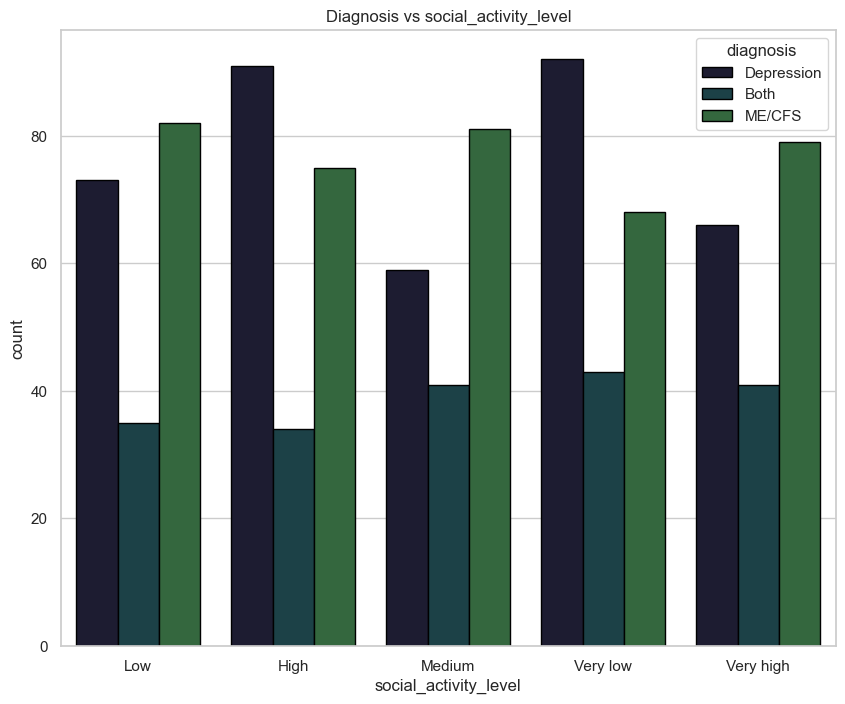

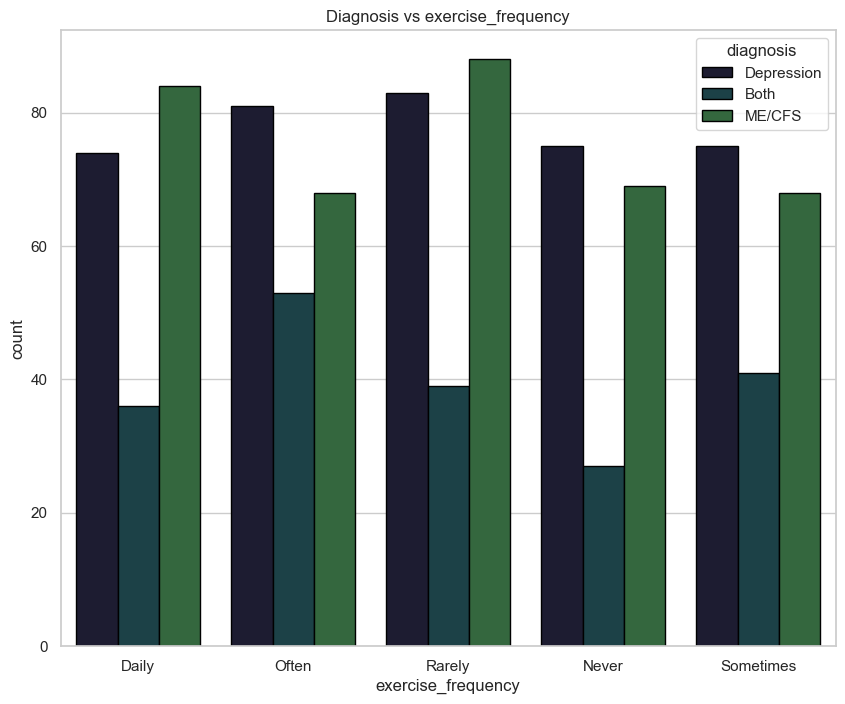

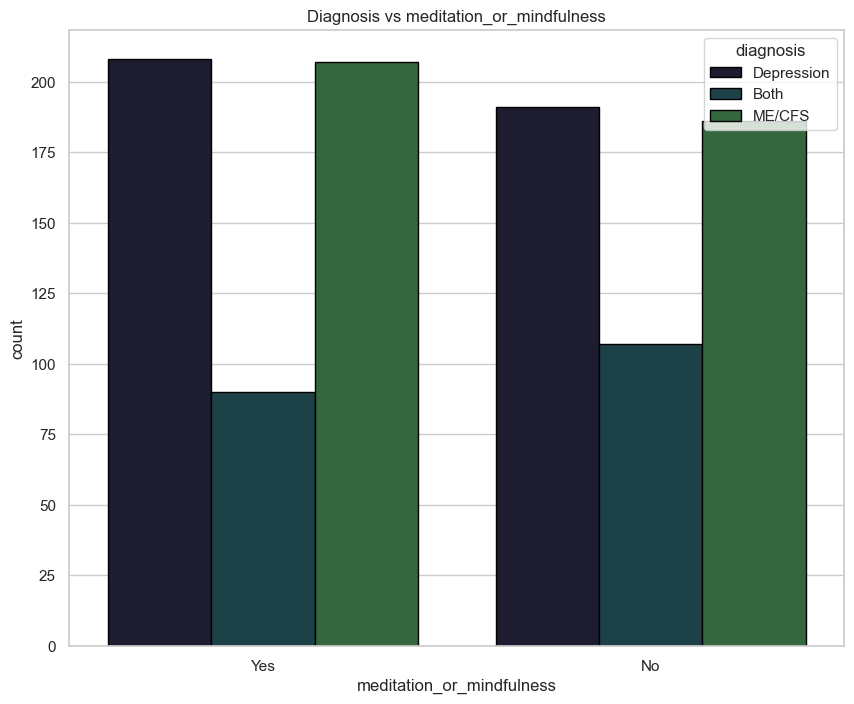

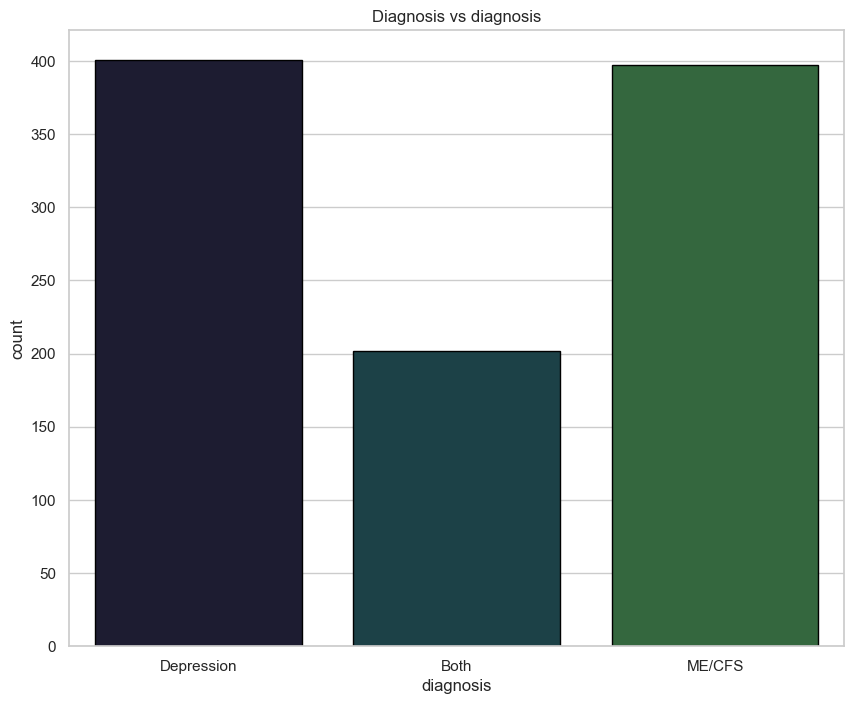

In [23]:
def plot_categoric(df,features):
    for feature in features:
        plt.figure(figsize=(10,8))
        sns.countplot(data=df, x=feature,hue='diagnosis', edgecolor='black')
        plt.title(f"Diagnosis vs {feature}")
        plt.show()

cat_features = df.select_dtypes(include=['object','category']).columns

plot_categoric(df,cat_features)

#### Categorical Analysis

- The proportion of Depression,Both,ME/CFS is consistent across genders
- There is an inverse relationship between social activity and depression levels; as social activity decreases, depression levels tend to rise.
- Whereas depression varies with social activity levels, ME/CFS symptoms remain relatively stable regardless of social engagement — a pattern consistent with the understanding that ME/CFS is not a psychological disorder

### Preprocessing

In [24]:
df_model = df.copy()

#### Handling Missing Values

We are going to fill numeric missing values using mean and median, and for categorical we will fill using mode.

In [25]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

df_mean = df.select_dtypes(include=['number'])
df_median = df.select_dtypes(include=['number'])
df_mode = df.select_dtypes(include=['number'])

df_mean[num_features] = mean_imputer.fit_transform(df_mean[num_features])
df_median[num_features] = median_imputer.fit_transform(df_median[num_features])
df_mode[num_features] = mode_imputer.fit_transform(df_mode[num_features])


In [26]:
print(f"Missing values after Mean imputation (Numeric)")
print(df_mean.isna().any())

Missing values after Mean imputation (Numeric)
age                             False
sleep_quality_index             False
brain_fog_level                 False
physical_pain_score             False
stress_level                    False
depression_phq9_score           False
fatigue_severity_scale_score    False
pem_duration_hours              False
hours_of_sleep_per_night        False
pem_present                     False
dtype: bool


In [27]:
print(f"Missing values after Median imputation (Numeric)")
print(df_median.isna().any())

Missing values after Median imputation (Numeric)
age                             False
sleep_quality_index             False
brain_fog_level                 False
physical_pain_score             False
stress_level                    False
depression_phq9_score           False
fatigue_severity_scale_score    False
pem_duration_hours              False
hours_of_sleep_per_night        False
pem_present                     False
dtype: bool


In [28]:
print(f"Missing values after Mode imputation (Numeric)")
print(df_mode.isna().any())

Missing values after Mode imputation (Numeric)
age                             False
sleep_quality_index             False
brain_fog_level                 False
physical_pain_score             False
stress_level                    False
depression_phq9_score           False
fatigue_severity_scale_score    False
pem_duration_hours              False
hours_of_sleep_per_night        False
pem_present                     False
dtype: bool


In [29]:
original_df_num = df_model.select_dtypes(include=['number']).dropna()
original_df_cat = df_model.select_dtypes(include=['object']).dropna()

Now we are going to use a t-test to compare the effect of imputing missing values vs dropping rows with missing values. We do this to see if the impuation significantly alters the distribution the dataset

In [30]:
from scipy.stats import ttest_ind

def print_statistical_significance(imputation_method, original_df, imputed_df):
    print(f"\nStatistical Significance for {imputation_method} Imputation (Numerical Columns):")

    for col in original_df.columns:
        original_values = original_df[col].dropna()
        imputed_values = imputed_df[col]

        try:
            t_stat, p_value = ttest_ind(original_values, imputed_values, nan_policy='omit')
            print(f"{col} - {imputation_method} Imputation p-value: {p_value:.4e}")

            if p_value < 0.05:
                print(f"↳ Statistically **significant** at 5% level → {imputation_method} likely altered the distribution.\n")
            else:
                print(f"↳ Not statistically significant.\n")

        except Exception as e:
            print(f"{col} - Error: {e}\n")
print_statistical_significance('Mean', original_df_num, df_mean)
print_statistical_significance('Median', original_df_num, df_median)
print_statistical_significance('Mode', original_df_num, df_mode)


Statistical Significance for Mean Imputation (Numerical Columns):
age - Mean Imputation p-value: 8.6127e-01
↳ Not statistically significant.

sleep_quality_index - Mean Imputation p-value: 9.5480e-01
↳ Not statistically significant.

brain_fog_level - Mean Imputation p-value: 8.1168e-01
↳ Not statistically significant.

physical_pain_score - Mean Imputation p-value: 8.0068e-01
↳ Not statistically significant.

stress_level - Mean Imputation p-value: 7.7308e-01
↳ Not statistically significant.

depression_phq9_score - Mean Imputation p-value: 6.2151e-01
↳ Not statistically significant.

fatigue_severity_scale_score - Mean Imputation p-value: 9.6649e-01
↳ Not statistically significant.

pem_duration_hours - Mean Imputation p-value: 8.8901e-01
↳ Not statistically significant.

hours_of_sleep_per_night - Mean Imputation p-value: 8.2461e-01
↳ Not statistically significant.

pem_present - Mean Imputation p-value: 9.1845e-01
↳ Not statistically significant.


Statistical Significance for Med

In [31]:
def plotting_imputed(imputed_df, col, method):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"{col} before {method} imputation")
    
    plt.subplot(1, 2, 2)
    sns.histplot(imputed_df[col], kde=True, color='orange')
    plt.title(f"{col} after {method} imputation")
    
    plt.tight_layout()
    plt.show()


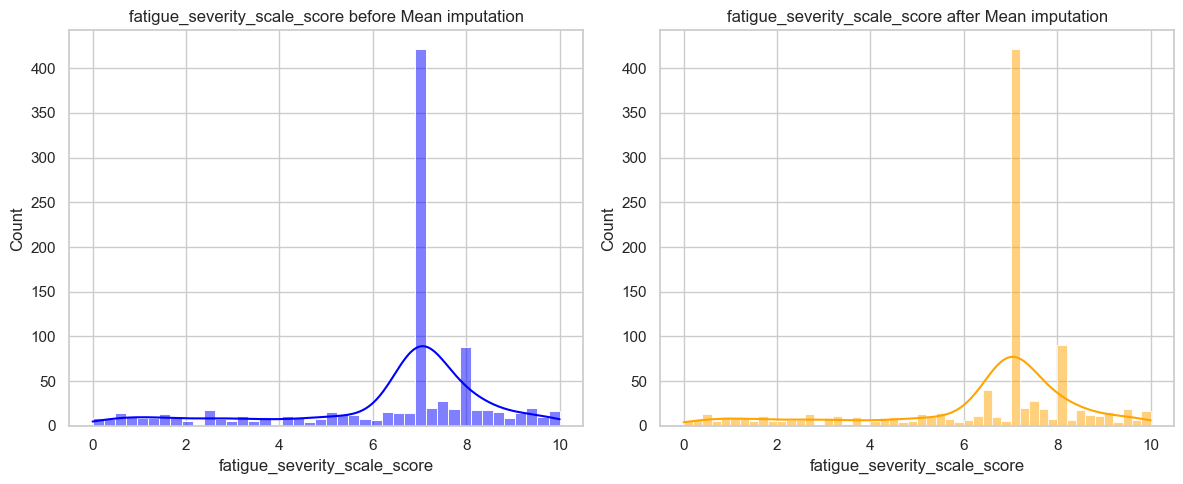

In [32]:
plotting_imputed(df_mean,'fatigue_severity_scale_score', method = 'Mean')

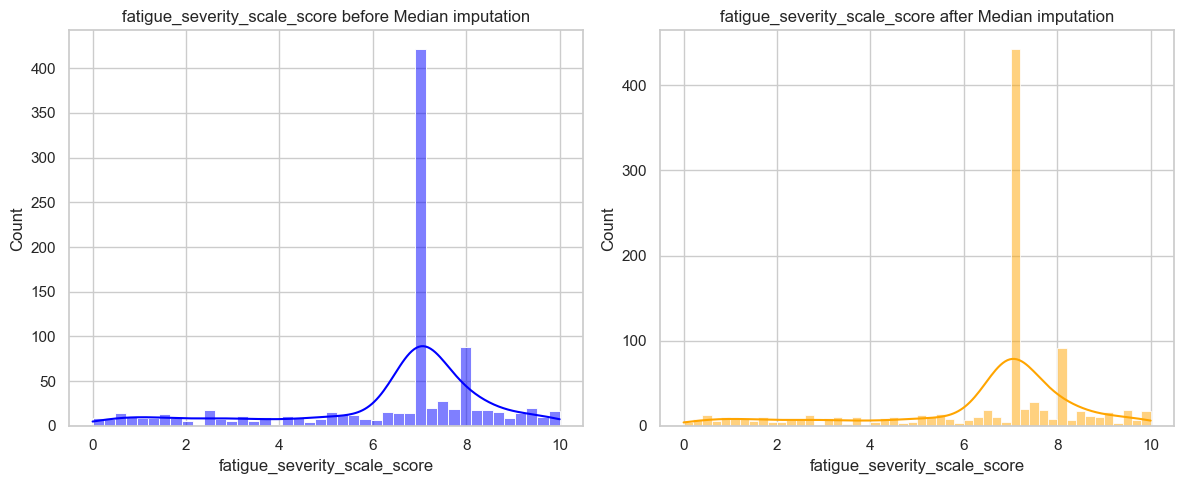

In [33]:
plotting_imputed(df_median,'fatigue_severity_scale_score', 'Median')

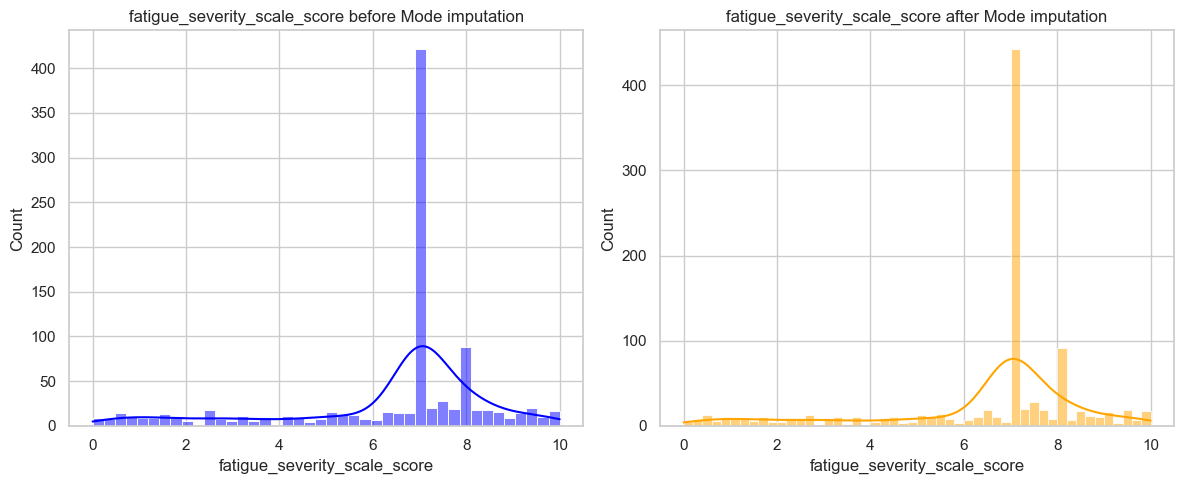

In [34]:
plotting_imputed(df_mode,'fatigue_severity_scale_score', 'Mode')

So as we can see, mean, median, and mode are both valid methods for imputation, not affecting the distribution enough from the orginal dataset. So for our purposes we will impute numeric features using mean and categorical features using mode

Now lets investigate imputing mode for categoric features using Chi-Square Test

In [35]:
df_mode_cat = df.select_dtypes(include=['object'])

In [36]:
from scipy.stats import chi2_contingency

def print_categorical_significance(imputation_method, original_df, imputed_df):
    print(f"\nChi-Square Test for {imputation_method} Imputation (Categorical Columns):")

    for col in original_df.columns:
        orig_counts = original_df[col].value_counts(dropna=True)
        imputed_counts = imputed_df[col].value_counts()

        try:
            contingency = pd.concat([orig_counts, imputed_counts], axis=1).fillna(0)
            chi2, p, dof, expected = chi2_contingency(contingency)
            print(f"{col} - {imputation_method} Imputation p-value: {p:.4e}")

            if p < 0.05:
                print(f"↳ Statistically significant → Distribution changed by imputation.\n")
            else:
                print(f"↳ Not statistically significant.\n")
        except Exception as e:
            print(f"{col} - Error: {e}\n")


In [37]:
print_categorical_significance('Mode', original_df_cat, df_mode_cat)


Chi-Square Test for Mode Imputation (Categorical Columns):
gender - Mode Imputation p-value: 8.4634e-01
↳ Not statistically significant.

work_status - Mode Imputation p-value: 9.8714e-01
↳ Not statistically significant.

social_activity_level - Mode Imputation p-value: 9.9990e-01
↳ Not statistically significant.

exercise_frequency - Mode Imputation p-value: 9.9300e-01
↳ Not statistically significant.

meditation_or_mindfulness - Mode Imputation p-value: 1.0000e+00
↳ Not statistically significant.

diagnosis - Mode Imputation p-value: 9.9195e-01
↳ Not statistically significant.



In [38]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='most_frequent')

df_model[num_features] = num_imputer.fit_transform(df_model[num_features])
df_model[cat_features] = cat_imputer.fit_transform(df_model[cat_features])

df_model.isna().any()

age                             False
gender                          False
sleep_quality_index             False
brain_fog_level                 False
physical_pain_score             False
stress_level                    False
depression_phq9_score           False
fatigue_severity_scale_score    False
pem_duration_hours              False
hours_of_sleep_per_night        False
pem_present                     False
work_status                     False
social_activity_level           False
exercise_frequency              False
meditation_or_mindfulness       False
diagnosis                       False
dtype: bool

#### Encoding Categorical Features

In [39]:
df_model_cat = df_model.select_dtypes(include=['object'])
df_model_cat.head()

gender        work_status social_activity_level exercise_frequency  \
0    Male            Working                   Low              Daily   
1    Male            Working                   Low              Often   
2  Female  Partially working              Very low             Rarely   
3  Female        Not working                  High              Never   
4  Female        Not working                   Low             Rarely   

  meditation_or_mindfulness   diagnosis  
0                       Yes  Depression  
1                       Yes        Both  
2                       Yes  Depression  
3                       Yes  Depression  
4                        No        Both

In [40]:
df_model_cat['social_activity_level'].unique()

array(['Low', 'Very low', 'High', 'Medium', 'Very high'], dtype=object)

In [41]:
df_model_cat['exercise_frequency'].unique()

array(['Daily', 'Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

#### Encoding Methods
We will seperate the cat columns by the method of which we will encode them (OneHotEncoding, OrdinalEncoding)

1. OneHotEncoding: Creates Binary columns for each category
2. Ordinal Encoding: Creates integers based on a defined order

In [42]:
one_hot_cols = ['gender','work_status','meditation_or_mindfulness']
ordinal_cols = ['social_activity_level','exercise_frequency']

In [43]:
# One-hot encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_array = ohe.fit_transform(df_model_cat[one_hot_cols])
ohe_cols = ohe.get_feature_names_out(one_hot_cols)
df_ohe = pd.DataFrame(ohe_array, columns=ohe_cols, index=df_model_cat.index)
df_model_cat = df_model_cat.drop(columns=one_hot_cols).join(df_ohe)

# Ordinal encoding
ord_social = OrdinalEncoder(categories=[['Very low','Low','Medium','High','Very high']])
ord_exercise = OrdinalEncoder(categories=[['Never','Rarely','Sometimes','Often','Daily']])

df_model_cat['social_activity_level'] = ord_social.fit_transform(df_model_cat[['social_activity_level']])
df_model_cat['exercise_frequency'] = ord_exercise.fit_transform(df_model_cat[['exercise_frequency']])


df_model_cat.head()

social_activity_level  exercise_frequency   diagnosis  gender_Male  \
0                    1.0                 4.0  Depression          1.0   
1                    1.0                 3.0        Both          1.0   
2                    0.0                 1.0  Depression          0.0   
3                    3.0                 0.0  Depression          0.0   
4                    1.0                 1.0        Both          0.0   

   work_status_Partially working  work_status_Working  \
0                            0.0                  1.0   
1                            0.0                  1.0   
2                            1.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   meditation_or_mindfulness_Yes  
0                            1.0  
1                            1.0  
2                            1.0  
3                            1.0  
4                            0.0

#### Scaling Numeric Features

In [44]:
df_model_num = df_model.select_dtypes(include = ['number'])

scaler = StandardScaler()

scaled = scaler.fit_transform(df_model_num)

df_model_num = pd.DataFrame(scaled, columns=df_model_num.columns)
df_model_num.head()

age  sleep_quality_index  brain_fog_level  physical_pain_score  \
0  0.758456             1.196975        -0.696071             1.351601   
1  1.607352            -1.666231         1.566839            -0.555877   
2  0.105459            -0.621548        -0.130344            -0.326980   
3 -0.808737             1.467819        -1.374944            -1.051822   
4  1.019655             0.771363         0.661675             0.283413   

   stress_level  depression_phq9_score  fatigue_severity_scale_score  \
0      1.075542              -0.351404                      0.036764   
1      1.788424               1.248070                      0.265683   
2     -0.587851               1.887859                     -2.206641   
3     -0.627455              -0.351404                      0.174116   
4      1.233960               0.768227                      0.265683   

   pem_duration_hours  hours_of_sleep_per_night  pem_present  
0           -0.992672                  0.540297    -1.222197  
1            1.318723                  0.885189     0.818199  
2           -0.703747                  0.146136    -1.222197  
3           -0.848210                  0.441757    -1.222197  
4            1.679878                 -1.726134     0.818199

In [45]:
df_model = pd.concat([df_model_num,df_model_cat], axis = 1)
df_model.head()

age  sleep_quality_index  brain_fog_level  physical_pain_score  \
0  0.758456             1.196975        -0.696071             1.351601   
1  1.607352            -1.666231         1.566839            -0.555877   
2  0.105459            -0.621548        -0.130344            -0.326980   
3 -0.808737             1.467819        -1.374944            -1.051822   
4  1.019655             0.771363         0.661675             0.283413   

   stress_level  depression_phq9_score  fatigue_severity_scale_score  \
0      1.075542              -0.351404                      0.036764   
1      1.788424               1.248070                      0.265683   
2     -0.587851               1.887859                     -2.206641   
3     -0.627455              -0.351404                      0.174116   
4      1.233960               0.768227                      0.265683   

   pem_duration_hours  hours_of_sleep_per_night  pem_present  \
0           -0.992672                  0.540297    -1.222197   
1            1.318723                  0.885189     0.818199   
2           -0.703747                  0.146136    -1.222197   
3           -0.848210                  0.441757    -1.222197   
4            1.679878                 -1.726134     0.818199   

   social_activity_level  exercise_frequency   diagnosis  gender_Male  \
0                    1.0                 4.0  Depression          1.0   
1                    1.0                 3.0        Both          1.0   
2                    0.0                 1.0  Depression          0.0   
3                    3.0                 0.0  Depression          0.0   
4                    1.0                 1.0        Both          0.0   

   work_status_Partially working  work_status_Working  \
0                            0.0                  1.0   
1                            0.0                  1.0   
2                            1.0                  0.0   
3                            0.0                  0.0   
4                            0.0                  0.0   

   meditation_or_mindfulness_Yes  
0                            1.0  
1                            1.0  
2                            1.0  
3                            1.0  
4                            0.0

### Modeling

In [46]:
X = df_model.drop('diagnosis', axis = 1)
y = df_model['diagnosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)

In [48]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],      # solvers that support l1/elasticnet
    'l1_ratio': [None, 0.2, 0.5, 0.8],     # Only used if penalty='elasticnet'
    'max_iter': [100, 500, 1000],
    'multi_class': ['ovr', 'multinomial']
}



In [49]:
def plot_eval(y_test,y_pred,model,name):
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {acc}")
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot = True, fmt = 'd',linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))
    (f"Best parameters for {name} : {model.best_params_}")
    print(f"Best cross validation accuracy for {name}: {model.best_score_}")
    
    

In [50]:
params_lr = {
    'penalty':['elasticnet'],
    'l1_ratio': [0.1,0.5,0.9], # The mix of l1 and l2 regularization
    'C': np.logspace(-4,4,20),
    'solver': ['saga'], # only saga supports elasticnet regularization
    'max_iter': [100,500,1000]
}

random_lr = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
    
)

random_lr.fit(X_train,y_train)

y_pred_lr = random_lr.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.

Accuracy of Logisitic Regression: 0.97


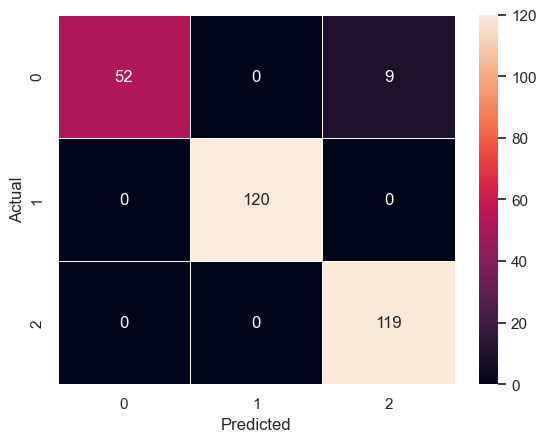

              precision    recall  f1-score   support

        Both       1.00      0.85      0.92        61
  Depression       1.00      1.00      1.00       120
      ME/CFS       0.93      1.00      0.96       119

    accuracy                           0.97       300
   macro avg       0.98      0.95      0.96       300
weighted avg       0.97      0.97      0.97       300

Best cross validation accuracy for Logisitic Regression: 0.9757142857142858


In [51]:
plot_eval(y_test,y_pred_lr,random_lr,'Logisitic Regression')

In [61]:
param_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gb = GradientBoostingClassifier(random_state=42)

random_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_gb,
    n_iter=10,      
    scoring='accuracy', 
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_gb.fit(X_train, y_train)

y_pred_gb = random_gb.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Accuracy of GradientBoosting: 0.9966666666666667


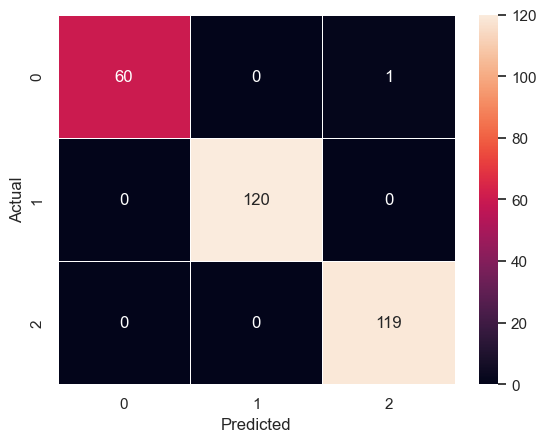

              precision    recall  f1-score   support

        Both       1.00      0.98      0.99        61
  Depression       1.00      1.00      1.00       120
      ME/CFS       0.99      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300

Best cross validation accuracy for GradientBoosting: 0.9971428571428571


In [62]:
plot_eval(y_test,y_pred_gb,random_gb,'GradientBoosting')